# Анализ CJM пользователей платформы по созданию чат-ботов. Оптимизация онбординга в первую сессию

### Задача

Компания — SaaS бизнес, платформа по созданию чат ботов. Целевая аудитория - маркетологи и владельцы бизнесов. Компания недавно запустила интеграцию с Instagram - теперь в этом канале существует возможность запускать ботов. В следствии этого на платформу пришло много нового трафика, в том числе пользователей, которые сталкиваются с чат ботами впервые. 

Вы — продуктовый аналитик компании и ваша цель помочь продакт менеджеру повысить качество онбординга, исходя из предположения, что обученные пользователи могут получить больше ценности от платформы и будут иметь больше мотивации оплатить платную подписку.

В качестве исходных данных вам дали события, которые генерировали пользователи в продукте в период с 2021-09-18 — 2021-11-23.

Примерный план работы:

Вы вместе с продакт менеджером решили копнуть в поведение пользователей в первую сессию, для того, чтобы сделать обучение и/или понять с кем лучше проводить качественные исследования. Для этого вам нужно сделать следующие шаги: 

1. Разбить ивенты на сессии (сессия = множество ивентов пользователя, между которыми проходит менее 30 минут)
2. Выделить сегменты на основе данных поведения пользователей в первой сессии (сделать кластеры)
3. Описать сегменты из бизнес смысла.
    - Пример, как мы представляем описание сегментов
        - сегмент 1: пользователи, которые после подключения канала уходят из продукта и у них нет первой сессии в первый день
        - сегмент 2: мотивированные пользователи, которые в первую сессию активно проходят онбординг
4. Сформулировать рекомендации: какие сегменты стоит брать в первую очередь и почему.

### Содержание проекта

**1\. Предобработка данных, разведывательный анализ**

1.1. Предобработка данных

1.2. Анализ структуры названий событий

1.3. Разделение событий на сессии, расчет связанных статистик

1.4. Обзор соотношений категориальных признаков по всем клиентам

**2\. Анализ поведения пользователей**

2.1. Кластеризация уникальных названий событий по смысловым группам

2.2. Кластеризация пользователей по CJM в первую сессию, описание кластеров

2.3. Сравнение CJM пользователей в первой сессии в выбраных кластерах

2.4. Оценка результатов освоения платформы и платежеспособности кластеров

2.5. Сравнение поведения пользователей в выбранных кластерах во второй сессии

2.6. Анализ соотношений категориальных признаков по кластерам

**3\. Выводы и рекомендации**

## 1. Предобработка данных, разведывательный анализ

В ходе предобработки:
- удалены данные пользователей, зарегистрированных ранее установленной даты начала записи логов, так как неизвестно, были ли у них ранее сессии;
- удалены данные пользователей с пропущенными значениями в полях event_name, event_dttm, account_creationdate (в том числе данные клиентов, не совершавших никаких действий на платформе, являющихся вторыми админами созданных аккаунтов);
- пропущенные значения по регионам заменены на Unknown по аналогии с другими столбцами;
- пропущенные значения остались только в полях с датами событий, связанных с активацией аккаунта и первой публикацией в инстаграм, а также связанных с приобретением пробной, полной или продвинутой подписки на платформу - это необязательные события, поэтому некритично;
- удалены записи о системных событиях, так как они не несли смысловой нагрузки.

В целом в ходе предобработки удалены данные около четверти клиентов - около трети записей.


В ходе разведывательного анализа установлено следующее.

1\. Названия событий состоят из нескольких частей, разделенных "." или " __ ":
* Они начинаются с платформы (web., mobile.). Исключение из этого правила составляют только события, начинающиеся с todo_list_item. - являются выделенной подгруппой в иерархии событий - они никогда не стоят первыми в сессии, и в абсолютном большинстве случаев им предшествуют события класса web, в структуре имен которых фигурируют блоки todo_list (89%) или прочие указатели на посказки и помощь.


* Далее идет иерархия разделов страницы/элементов интерфейса (например, web.onboarding.leave_modal.), таких блоков может быть до 5.


* И заканчивается все, как правило, действием в этом разделе/элементе интерфейса. Например, итоговое название события может выглядеть так: web.onboarding.leave_modal.show 

2\. Общие временные параметры поведения пользователей на платформе:

* половина клиентов уложилась в 9 минут на весь CJM, 80% - в 43 минуты;

* половина клиентов уложилась в 24 шага на весь CJM, 80% сделали не более 65 шагов;

* половина клиентов провела на платформе лишь одну сессию, 80% уложилось в 3 сессии;

* половина сессий составила не более 8 шагов, в 80% сессий пользователи сделали не более 26 шагов.

3\. Общая информация о клиентах:
* большинство пользователей из Южной Америки (\~40%) и Азии (\~25%), на третьем месте - русскоговорящие страны (~10%).
* самыми популярными индустриями стали инфопредпринимательство и электронная коммерция (в сумме ~25%), большинство пользователей выбрало Прочее в этой графе.
* по источнику узнавания лидируют сарафанное радио, поисковые выдачи - примерно по 30%, и соцсети (~20%)
* по источнику трафика мало данных, но по тем, что есть, лидирует органика (~30%).
* десктоп стал самым популярным первым устройством пользователей (~60%), доля мобильных платформ в сумме составляет ~40%, соотношение между ними примерно равное.

Далее можно посмотреть код разведовательного анализа, а можно сразу перейти к сладкому - кластеризации во втором разделе.

### 1.1. Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import re
import random
import textwrap
import statsmodels.stats.api as sms

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import retentioneering as rete

In [2]:
path = (r'C:\\Users\Михаил\Desktop\Data analysis\Карьерный цех Конкурс аналитиков\ВЕСНА 2022\2 Hard Задание retentioneering\Dataset for Career Factory 22032022.csv')
data0 = pd.read_csv(path, parse_dates=['account_creationdate', 'client_creationdate', 'ig_enable_dttm',
                                       'ig_activation_dttm', 'trial_dttm', 'paid_dttm', 'pro_dttm', 
                                       'first_ig_flow_publish_dttm','event_dttm'])\
.drop(columns='Unnamed: 0')

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
data0.head()

account_id       account_creationdate  client_id  \
0           1 2021-10-05 20:36:07.068230     100000   
1           1 2021-10-05 20:36:07.068230     100000   
2           1 2021-10-05 20:36:07.068230     100000   
3           1 2021-10-05 20:36:07.068230     100000   
4           1 2021-10-05 20:36:07.068230     100000   

         client_creationdate admin_status country_group industry  \
0 2021-10-05 20:33:30.173973    1st admin          Asia    Other   
1 2021-10-05 20:33:30.173973    1st admin          Asia    Other   
2 2021-10-05 20:33:30.173973    1st admin          Asia    Other   
3 2021-10-05 20:33:30.173973    1st admin          Asia    Other   
4 2021-10-05 20:33:30.173973    1st admin          Asia    Other   

                          hear_source  support_provided initial_channel  \
0  Recommended by friend or colleague             False              IG   
1  Recommended by friend or colleague             False              IG   
2  Recommended by friend or colleague             False              IG   
3  Recommended by friend or colleague             False              IG   
4  Recommended by friend or colleague             False              IG   

   ig_followerscount             ig_enable_dttm traffic_source  \
0             1022.0 2021-10-05 20:36:07.923779        Organic   
1             1022.0 2021-10-05 20:36:07.923779        Organic   
2             1022.0 2021-10-05 20:36:07.923779        Organic   
3             1022.0 2021-10-05 20:36:07.923779        Organic   
4             1022.0 2021-10-05 20:36:07.923779        Organic   

  first_device_type_of_user  first_account_for_user current_account_status  \
0                   Android                    True                   free   
1                   Android                    True                   free   
2                   Android                    True                   free   
3                   Android                    True                   free   
4                   Android                    True                   free   

   ltv_predicted ig_activation_dttm trial_dttm paid_dttm pro_dttm  \
0           9679                NaT        NaT       NaT      NaT   
1           9679                NaT        NaT       NaT      NaT   
2           9679                NaT        NaT       NaT      NaT   
3           9679                NaT        NaT       NaT      NaT   
4           9679                NaT        NaT       NaT      NaT   

  first_ig_flow_publish_dttm                                event_name  \
0                        NaT           mobile.automations_list__opened   
1                        NaT                     mobile.audience__open   
2                        NaT                  mobile.dialog_list__open   
3                        NaT  todo_list_item.try_ig_automation.started   
4                        NaT              web.home_tab.todo_list.shown   

                  event_dttm  
0 2021-10-05 21:10:36.267423  
1 2021-10-05 21:10:35.395335  
2 2021-10-05 21:10:29.657045  
3 2021-10-05 20:42:06.134447  
4 2021-10-05 20:41:28.228258

In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869278 entries, 0 to 869277
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   account_id                  869278 non-null  int64         
 1   account_creationdate        869039 non-null  datetime64[ns]
 2   client_id                   869278 non-null  int64         
 3   client_creationdate         867655 non-null  datetime64[ns]
 4   admin_status                869278 non-null  object        
 5   country_group               860573 non-null  object        
 6   industry                    869278 non-null  object        
 7   hear_source                 869278 non-null  object        
 8   support_provided            869278 non-null  bool          
 9   initial_channel             869278 non-null  object        
 10  ig_followerscount           869276 non-null  float64       
 11  ig_enable_dttm              869278 non-

In [6]:
data0.isna().sum()

account_id                         0
account_creationdate             239
client_id                          0
client_creationdate             1623
admin_status                       0
country_group                   8705
industry                           0
hear_source                        0
support_provided                   0
initial_channel                    0
ig_followerscount                  2
ig_enable_dttm                     0
traffic_source                     0
first_device_type_of_user          0
first_account_for_user             0
current_account_status           239
ltv_predicted                      0
ig_activation_dttm            670993
trial_dttm                    592563
paid_dttm                     706829
pro_dttm                      579375
first_ig_flow_publish_dttm    450410
event_name                      1307
event_dttm                      1230
dtype: int64

In [7]:
data0.account_id.nunique()

17560

In [8]:
data0.client_id.nunique()

15970

In [9]:
data0.groupby('account_id', as_index=False).agg({'client_id':'nunique'}).client_id.max()

1

In [10]:
data0.groupby('client_id', as_index=False).agg({'account_id':'nunique'}).sort_values('account_id', ascending=0).head()

client_id  account_id
197      100197          26
2972     102972          24
2826     102826          23
372      100372          19
2222     102222          12

Каждый аккаунт принадлежит только одному клиенту, при этом один клиент может иметь несколько аккаунтов. 

Максимум аккаунтов на одного клиента - 26.

In [11]:
data0.nunique()

account_id                     17560
account_creationdate           17552
client_id                      15970
client_creationdate            15945
admin_status                       2
country_group                      8
industry                          11
hear_source                        5
support_provided                   2
initial_channel                    3
ig_followerscount               6216
ig_enable_dttm                 17560
traffic_source                     5
first_device_type_of_user          3
first_account_for_user             2
current_account_status             6
ltv_predicted                  12648
ig_activation_dttm              5137
trial_dttm                      4424
paid_dttm                       2286
pro_dttm                        4743
first_ig_flow_publish_dttm     10874
event_name                       632
event_dttm                    868041
dtype: int64

Рассмотрим все варианты категориальных переменных (число уникальных значений в которых не превышает 20).

In [12]:
for col in list(data0.nunique()[data0.nunique() < 20].index):
    print(f'{col}: ', data0[col].value_counts().index.values, end='\n\n')

admin_status:  ['1st admin' 'other admin']

country_group:  ['South America' 'Asia' 'Russian Speaking Countries' 'Europe'
 'North America' 'United States' 'Africa' 'Other']

industry:  ['Unknown' 'E-commerce' 'Local business or place' 'Other'
 'Infopreneurship' 'Professional consulting' 'Personal blog'
 'Organisation or institution' 'Celebrity, Artist or Public Figure'
 'Hotel and hospitality' 'Fun (jokes, community, daily quotes, etc.)']

hear_source:  ['Recommended by friend or colleague' 'Search Engine' 'Social media'
 'Other' 'Blog or publication']

support_provided:  [False True]

initial_channel:  ['IG' 'FB' 'Other']

traffic_source:  ['Unknown' 'Organic' 'Search' 'Referral' 'Social Media']

first_device_type_of_user:  ['Desktop' 'Android' 'iOS']

first_account_for_user:  [True False]

current_account_status:  ['free' 'pro' 'expired' 'blocked' 'trial_pro' 'vip']



Вернемся к клиенту, создавшему 26 аккаунтов и посмотрим, с какой частотой (по дням) он создавал свои аккаунты.

In [13]:
s = data0.loc[data0.client_id == 100197,:]
s.account_creationdate = s.account_creationdate.dt.date
s.groupby(['client_id','account_creationdate'], as_index=False).agg({'account_id':'nunique'})

C:\Games\Anaconda\Anaconda installed\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


client_id account_creationdate  account_id
0     100197           2021-09-20           6
1     100197           2021-09-27           6
2     100197           2021-10-09           6
3     100197           2021-10-29           2
4     100197           2021-10-30           6

Данный клиент создавал свои аккаунты "пачками" по 6 штук (один раз 2) в день.

Посмотрим, сколько аккаунтов в день максимально создавали клиенты.

In [14]:
s = data0.copy()
s.account_creationdate = s.apply({'account_creationdate':lambda x: x.dt.date})
s = s.groupby(['client_id','account_creationdate'], as_index=False)\
.agg({'account_id':'nunique'}).sort_values('account_id', ascending=False)
s.head()

client_id account_creationdate  account_id
608      100536           2021-09-26          10
3161     102826           2021-10-08           9
21       100021           2021-10-18           9
2484     102222           2021-09-27           8
3159     102826           2021-09-20           8

In [15]:
s.account_id.quantile([0,0.96,1])

0.00     1.0
0.96     1.0
1.00    10.0
Name: account_id, dtype: float64

В основном клиенты создавали не более 1 аккаунта в день (в 96% случаев). Максимальное число аккаунтов на одного клиента в день составило 10.

Рассмотрим более детально поведение клиента 100536, создавшего 10 аккаунтов за один день.

In [16]:
data0[data0.client_id == 100536].client_creationdate.dt.date.unique()

array([datetime.date(2021, 7, 10)], dtype=object)

In [17]:
data0[data0.client_id == 100536].account_creationdate.dt.date.unique()

array([datetime.date(2021, 9, 26)], dtype=object)

In [18]:
data0[data0.client_id == 100536].event_dttm.dt.date.value_counts().sort_index()

2021-09-26    187
2021-09-27    124
2021-09-30      3
2021-10-05     21
2021-10-07     15
2021-10-10     61
2021-10-11      9
2021-10-22     11
2021-10-24      4
2021-11-02     24
2021-11-05      5
Name: event_dttm, dtype: int64

Данный клиент зарегистрирован ранее начала мониторинга событий. 

Все 10 аккаунтов созданы в первый день активности клиента в рамках рассмартриваемого периода.

Разберемся с датами.

In [19]:
data0.loc[:,data0.columns[data0.columns.str.contains('date|dttm', regex=True)]]\
.apply(['min','max']).apply(lambda x: x.dt.date)

account_creationdate client_creationdate ig_enable_dttm  \
min           2016-05-11          2016-01-27     2021-09-18   
max           2021-10-31          2021-10-31     2021-10-31   

    ig_activation_dttm  trial_dttm   paid_dttm    pro_dttm  \
min         2021-06-08  2021-05-11  2016-12-22  2016-12-22   
max         2021-11-16  2021-11-15  2021-11-14  2021-11-14   

    first_ig_flow_publish_dttm  event_dttm  
min                 2020-01-04  2021-09-18  
max                 2021-11-16  2021-11-23

По условию в качестве исходных данных нам дали события, которые генерировали пользователи в продукте в период с 2021-09-18 — 2021-11-23 (столбец event_dttm это подтверждает). 

В рамках данного исследования нас интересуют именно новые пользователи и их первые шаги на платформе, поэтому клиентов с датой регистраци до 2021-09-18 мы исключаем, так как не знаем, были ли у них другие сессии ранее.

In [20]:
data_clean = data0.query('client_creationdate >= @pd.to_datetime("2021-09-18")')

In [21]:
data_clean.loc[:,data_clean.columns[data_clean.columns.str.contains('date|dttm', regex=True)]]\
.apply(['min','max']).apply(lambda x: x.dt.date)

account_creationdate client_creationdate ig_enable_dttm  \
min           2021-09-18          2021-09-18     2021-09-18   
max           2021-10-31          2021-10-31     2021-10-31   

    ig_activation_dttm  trial_dttm   paid_dttm    pro_dttm  \
min         2021-09-18  2021-09-18  2021-09-20  2021-09-18   
max         2021-11-16  2021-11-15  2021-11-14  2021-11-14   

    first_ig_flow_publish_dttm  event_dttm  
min                 2021-09-18  2021-09-18  
max                 2021-11-16  2021-11-23

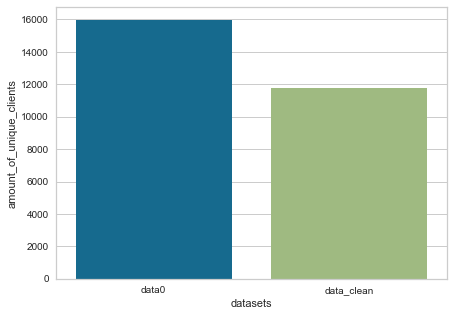

     datasets  amount_of_unique_clients      %
0       data0                     15970  100.0
1  data_clean                     11754   73.6


In [22]:
df=pd.DataFrame({'datasets':['data0', 'data_clean'],
              'amount_of_unique_clients':[data0.client_id.nunique(), data_clean.client_id.nunique()]})
df['%'] = round(df.amount_of_unique_clients * 100 / df.amount_of_unique_clients[0], 1)
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='datasets', y='amount_of_unique_clients')
plt.show()
print(df)

Удалены данные около четверти клиентов. Вот и славно.

Сопоставим даты целевых событий взаимодействия пользователя с платформой, начиная с регистрации клиента, без учета дат оплаты подписок.

In [23]:
s = data_clean.groupby(['client_id','client_creationdate','account_id','account_creationdate',
                        'ig_enable_dttm','ig_activation_dttm','first_ig_flow_publish_dttm'], as_index=False)\
.agg({'event_dttm':'min'}).rename(columns={'event_dttm':'event_dttm_min'})
s['account_client_dttm_diff'] = (s['account_creationdate'] - s['client_creationdate']).dt.total_seconds() / 60
s['eventmin_account_dttm_diff'] = (s['event_dttm_min'] - s['account_creationdate']).dt.total_seconds() / 60
s['enable_event_dttm_diff'] = (s['event_dttm_min'] - s['ig_enable_dttm']).dt.total_seconds() / 60
s['activation_enable_dttm_diff'] = (s['ig_activation_dttm'] - s['ig_enable_dttm']).dt.total_seconds() / 60
s['publish_enable_dttm_diff'] = (s['first_ig_flow_publish_dttm'] - s['ig_enable_dttm']).dt.total_seconds() / 60
s['publish_activation_dttm_diff'] = (s['first_ig_flow_publish_dttm'] - s['ig_activation_dttm']).dt.total_seconds() / 60
s.loc[:,s.columns[s.columns.str.contains('diff', regex=True)]].apply(['min','median','max'])

account_client_dttm_diff  eventmin_account_dttm_diff  \
min                     0.090581                    0.113182   
median                  4.521312                    2.215752   
max                 58536.320882                56050.498837   

        enable_event_dttm_diff  activation_enable_dttm_diff  \
min                   0.005593                     3.573495   
median                1.627895                  2989.355212   
max               56050.495444                 75190.926718   

        publish_enable_dttm_diff  publish_activation_dttm_diff  
min                -23676.293229                 -72620.977513  
median                 17.893840                  -2394.601010  
max                 72216.196281                  31677.189956

Путем подгонки разностей после нескольких итераций было предварительно сформировано несколько предположений:

1) регистрация аккаунта происходит после регистрации клиента, чего и следовало ожидать

2) записи о событиях начинаются после регистрации аккаунта - записей до регистрации аккаунта либо нет, либо время таких событий не фиксируется (nan в графе event_dttm)

3) событие ig_enable_dttm по-видимому случается в результате действий пользователя на платформе и предваряет событие ig_activation_dttm, можно предположить, что эти события означают получение доступа бота к инстаграму и его активацию там

4) событие first_ig_flow_publish_dttm может происходить как до, так и после событий ig_enable_dttm и ig_activation_dttm, при этом установлено, что оно происходит строго после совершения первого действия пользователя на платформе, а значит, скорее всего, также является результатом его действий. 

In [24]:
data_clean.isna().sum()

account_id                         0
account_creationdate              39
client_id                          0
client_creationdate                0
admin_status                       0
country_group                   5208
industry                           0
hear_source                        0
support_provided                   0
initial_channel                    0
ig_followerscount                  0
ig_enable_dttm                     0
traffic_source                     0
first_device_type_of_user          0
first_account_for_user             0
current_account_status            39
ltv_predicted                      0
ig_activation_dttm            423348
trial_dttm                    401126
paid_dttm                     490962
pro_dttm                      390040
first_ig_flow_publish_dttm    263466
event_name                       728
event_dttm                       704
dtype: int64

In [25]:
data_clean[data_clean.account_creationdate.isna()].groupby(['client_id','account_id'], as_index=False)\
.client_creationdate.count()

client_id  account_id  client_creationdate
0     105262        5460                    4
1     106445        6723                   35

In [26]:
data_clean[data_clean.client_id.isin([105262,106445])].client_id.value_counts()

106445    35
105262     4
Name: client_id, dtype: int64

Дата создания аккаунта и текущий статус аккаунта не указаны для двух аккаунтов, принадлежащих разным клиентам, у которых нет других аккаунтов. Данная информация может быть важна для дальнейшего анализа, так как дата регистрации аккаунта является ступенью освоения функционала платформы. Принимая во внимание малое количество таких клиентов, исключим их данные из анализа.

In [27]:
data_clean = data_clean[data_clean.client_id.isin([105262,106445])==False]

In [28]:
data_clean.isna().sum()

account_id                         0
account_creationdate               0
client_id                          0
client_creationdate                0
admin_status                       0
country_group                   5208
industry                           0
hear_source                        0
support_provided                   0
initial_channel                    0
ig_followerscount                  0
ig_enable_dttm                     0
traffic_source                     0
first_device_type_of_user          0
first_account_for_user             0
current_account_status             0
ltv_predicted                      0
ig_activation_dttm            423348
trial_dttm                    401087
paid_dttm                     490923
pro_dttm                      390001
first_ig_flow_publish_dttm    263466
event_name                       728
event_dttm                       704
dtype: int64

По некоторым записям не указаны названия событий и их даты. Это ключевые параметры для анализа траектории пользователя при взаимодейстии с платформой, поэтому изучим этих клиентов более подробно.

In [29]:
data_clean[(data_clean.event_name.isna()) | (data_clean.event_dttm.isna())].client_id.nunique()

651

In [30]:
data_clean.client_id.nunique()

11752

In [31]:
round(data_clean[(data_clean.event_name.isna()) | (data_clean.event_dttm.isna())].client_id.nunique() *100 /\
data_clean.client_id.nunique(), 1)

5.5

Пропущенные значения хотя бы по одному из указанных параметров встречаются у 5.5% пользователей, это довольно весомый процент, нужно разбираться.

In [32]:
l = data_clean[(data_clean.event_name.isna()) | (data_clean.event_dttm.isna())].client_id.unique()
s = data_clean[data_clean.client_id.isin(l)]
s['event_name_is_nan'] = s.event_name.isna()
s['event_dttm_is_nan'] = s.event_dttm.isna()
s = s.groupby('client_id', as_index=False).agg({'account_id':'count',
                                                'event_name_is_nan':'sum',
                                                'event_dttm_is_nan':'sum'})\
                      .rename(columns={'account_id':'all_events'})
s.head()

C:\Games\Anaconda\Anaconda installed\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


client_id  all_events  event_name_is_nan  event_dttm_is_nan
0     100035          14                  1                  1
1     100055         378                  3                  0
2     100083           1                  1                  1
3     100129           1                  1                  1
4     100146          37                  1                  1

In [33]:
s.query('all_events == 1 & event_name_is_nan == 1 & event_dttm_is_nan == 1').client_id.count()

560

560/651 клиентов не имеют прочих событий, кроме одного пустого.

In [34]:
s.query('all_events == event_name_is_nan & event_name_is_nan == event_dttm_is_nan \
        & (event_name_is_nan > 1 | event_dttm_is_nan > 1)').client_id.count()

19

Еще 19/651 клиентов имеют более одного пустого события и ничего кроме.

In [35]:
s.query('all_events > 1 & (event_name_is_nan == 1 | event_dttm_is_nan == 1)').client_id.count()

64

64/651 клиента имеют одно пустое событие и при этом непустые события тоже.

In [36]:
s.query('all_events > event_name_is_nan & all_events > event_dttm_is_nan \
        & (event_name_is_nan > 1 | event_dttm_is_nan > 1)').client_id.count()

8

8/651 клиентов имеют более одного пустого события и при этом непустые события тоже.

События с пропущенным названием у клиентов, имеющих другие непустые события необходимо удалить, так как они не несут никакой смысловой нагрузки. Аналогично события с пропущенным временем, они также только зашумляют CJM пользователя из-за невозможности определиить их положение относительно прочих непустых событий.

В случае же с клиентами, по которым вообще не было никаких событий кроме пустых, создадим фиктивное событие NO_SESSIONS и установим для порядка время, равное времени регистрации аккаунта. И рассмотрим их более подробно.

In [37]:
l = s.query('all_events == event_name_is_nan & event_name_is_nan == event_dttm_is_nan').client_id.unique()
data_clean.event_name = data_clean.apply(lambda x: 'NO_SESSIONS' if x.client_id in l else x.event_name, 1)
data_clean.event_dttm = data_clean.apply(lambda x: x.account_creationdate if x.event_name == 'NO_SESSIONS' 
                                         else x.event_dttm, 1)

In [38]:
data_clean.query('event_name == "NO_SESSIONS"').head()

account_id       account_creationdate  client_id  \
15601          84 2021-09-19 20:31:28.282710     100083   
42012         131 2021-10-03 18:20:33.817873     100129   
44472         153 2021-10-13 20:53:42.245728     100151   
59889         226 2021-09-24 09:10:47.210314     100224   
65094         253 2021-10-13 17:48:06.616834     100251   

             client_creationdate admin_status  country_group industry  \
15601 2021-09-19 20:29:53.236131  other admin           Asia  Unknown   
42012 2021-10-03 18:16:34.526910  other admin  South America  Unknown   
44472 2021-10-13 20:52:29.679734  other admin         Europe  Unknown   
59889 2021-09-24 09:08:52.048245  other admin  South America  Unknown   
65094 2021-10-13 17:37:06.114069  other admin           Asia  Unknown   

                              hear_source  support_provided initial_channel  \
15601                       Search Engine             False              IG   
42012  Recommended by friend or colleague             False              IG   
44472                       Search Engine             False              IG   
59889                               Other             False              IG   
65094                 Blog or publication             False              IG   

       ig_followerscount             ig_enable_dttm traffic_source  \
15601             5041.0 2021-09-19 20:31:28.601984        Unknown   
42012             6295.0 2021-10-03 18:20:33.997386        Organic   
44472             4333.0 2021-10-13 20:53:42.681574        Unknown   
59889             4415.0 2021-09-24 09:10:47.524685        Unknown   
65094              748.0 2021-10-13 17:48:06.845661        Unknown   

      first_device_type_of_user  first_account_for_user  \
15601                       iOS                    True   
42012                   Desktop                    True   
44472                   Desktop                    True   
59889                       iOS                    True   
65094                   Desktop                    True   

      current_account_status  ltv_predicted ig_activation_dttm trial_dttm  \
15601                   free           3495                NaT        NaT   
42012                   free          -7953                NaT        NaT   
44472                   free           7611                NaT        NaT   
59889                   free           9541                NaT        NaT   
65094                   free          -5190                NaT        NaT   

      paid_dttm pro_dttm first_ig_flow_publish_dttm   event_name  \
15601       NaT      NaT                        NaT  NO_SESSIONS   
42012       NaT      NaT                        NaT  NO_SESSIONS   
44472       NaT      NaT                        NaT  NO_SESSIONS   
59889       NaT      NaT                        NaT  NO_SESSIONS   
65094       NaT      NaT                        NaT  NO_SESSIONS   

                      event_dttm  
15601 2021-09-19 20:31:28.282710  
42012 2021-10-03 18:20:33.817873  
44472 2021-10-13 20:53:42.245728  
59889 2021-09-24 09:10:47.210314  
65094 2021-10-13 17:48:06.616834

In [39]:
data_clean.shape[0]

567287

In [40]:
data_clean = data_clean.dropna(subset=['event_name'])

In [41]:
data_clean.shape[0]

567187

In [42]:
s.query('all_events > event_name_is_nan & all_events > event_dttm_is_nan').event_name_is_nan.sum()

100

Ничего лишнего не удалили.

In [43]:
data_clean.query('event_name == "NO_SESSIONS"').admin_status.value_counts()

other admin    628
Name: admin_status, dtype: int64

Клиенты без сессий не являются основными админами своих аккаунтов.

In [44]:
data_clean.query('admin_status == "other admin"').client_id.nunique()

599

Всего 599 клиентов не являются основными админами своих аккаунтов, 579 из них не имеют записей о событиях.

Удалим записи этих 579 клиентов, так как для наших целей они не информативны. И рассмотрим подробнее действия оставшихся 20 клиентов.

In [45]:
data_clean = data_clean.query('event_name != "NO_SESSIONS"')

In [46]:
data_clean.query('admin_status == "other admin"').client_id.nunique()

20

In [47]:
data_clean.query('admin_status == "other admin"').groupby('client_id').event_name.count().median()

29.0

In [48]:
data_clean.query('admin_status == "other admin"').event_name.value_counts()

web.builder.floating_menu.delete_node                    258
web.builder.publish_attempt                              217
web.page_view.edit_content                               194
web.page_view.content                                    181
web.interface.dashboard.page_view                        146
                                                        ... 
web.builder_tab.quick_campaign_list.search_input.blur      1
web.page_view.welcome_message                              1
mobile.dialog__title__done                                 1
web.settings.channel_other_section.emptystate_open         1
mobile.settings__open                                      1
Name: event_name, Length: 164, dtype: int64

Судя по медианному количеству шагов и разнообразию событий, эти клиенты достаточно активны. Оставим их, но будем иметь в виду наличие такой подгруппы при разбиении клиентов на кластеры.

In [49]:
data_clean.isna().sum()

account_id                         0
account_creationdate               0
client_id                          0
client_creationdate                0
admin_status                       0
country_group                   5151
industry                           0
hear_source                        0
support_provided                   0
initial_channel                    0
ig_followerscount                  0
ig_enable_dttm                     0
traffic_source                     0
first_device_type_of_user          0
first_account_for_user             0
current_account_status             0
ltv_predicted                      0
ig_activation_dttm            422743
trial_dttm                    400495
paid_dttm                     490242
pro_dttm                      389407
first_ig_flow_publish_dttm    262990
event_name                         0
event_dttm                         0
dtype: int64

Из условно обязательных полей пропущенные значения остались только по регионам (country_group).

In [50]:
data_clean.query('country_group != country_group').head()

account_id       account_creationdate  client_id  \
115455         769 2021-10-06 10:43:26.950893     100758   
115456         769 2021-10-06 10:43:26.950893     100758   
115457         769 2021-10-06 10:43:26.950893     100758   
115458         769 2021-10-06 10:43:26.950893     100758   
115459         769 2021-10-06 10:43:26.950893     100758   

              client_creationdate admin_status country_group industry  \
115455 2021-10-06 10:43:11.869038    1st admin           NaN  Unknown   
115456 2021-10-06 10:43:11.869038    1st admin           NaN  Unknown   
115457 2021-10-06 10:43:11.869038    1st admin           NaN  Unknown   
115458 2021-10-06 10:43:11.869038    1st admin           NaN  Unknown   
115459 2021-10-06 10:43:11.869038    1st admin           NaN  Unknown   

         hear_source  support_provided initial_channel  ig_followerscount  \
115455  Social media             False              IG              158.0   
115456  Social media             False              IG              158.0   
115457  Social media             False              IG              158.0   
115458  Social media             False              IG              158.0   
115459  Social media             False              IG              158.0   

                   ig_enable_dttm traffic_source first_device_type_of_user  \
115455 2021-10-06 10:43:27.154042        Unknown                       iOS   
115456 2021-10-06 10:43:27.154042        Unknown                       iOS   
115457 2021-10-06 10:43:27.154042        Unknown                       iOS   
115458 2021-10-06 10:43:27.154042        Unknown                       iOS   
115459 2021-10-06 10:43:27.154042        Unknown                       iOS   

        first_account_for_user current_account_status  ltv_predicted  \
115455                    True                   free           5385   
115456                    True                   free           5385   
115457                    True                   free           5385   
115458                    True                   free           5385   
115459                    True                   free           5385   

       ig_activation_dttm trial_dttm paid_dttm pro_dttm  \
115455                NaT        NaT       NaT      NaT   
115456                NaT        NaT       NaT      NaT   
115457                NaT        NaT       NaT      NaT   
115458                NaT        NaT       NaT      NaT   
115459                NaT        NaT       NaT      NaT   

       first_ig_flow_publish_dttm                       event_name  \
115455                        NaT  mobile.dialog_list__page_avatar   
115456                        NaT  mobile.dialog_list__page_avatar   
115457                        NaT  mobile.dialog_list__page_avatar   
115458                        NaT            mobile.audience__open   
115459                        NaT            mobile.audience__open   

                       event_dttm  
115455 2021-10-06 10:52:07.886067  
115456 2021-10-06 10:52:07.739313  
115457 2021-10-06 10:52:07.581469  
115458 2021-10-06 10:52:07.336034  
115459 2021-10-06 10:52:07.182229

In [51]:
data_clean.query('country_group != country_group').industry.value_counts()

Other                                         2458
Local business or place                        883
Unknown                                        430
Infopreneurship                                321
Professional consulting                        227
Fun (jokes, community, daily quotes, etc.)     191
Personal blog                                  190
Hotel and hospitality                          168
E-commerce                                     146
Celebrity, Artist or Public Figure              83
Organisation or institution                     54
Name: industry, dtype: int64

In [52]:
data_clean.query('country_group != country_group').traffic_source.value_counts()

Unknown     3420
Organic     1394
Search       194
Referral     143
Name: traffic_source, dtype: int64

In [53]:
data_clean.groupby(['client_id']).agg({'country_group':'nunique'}).max()

country_group    1
dtype: int64

In [54]:
data_clean.groupby(['account_id']).agg({'country_group':'nunique'}).max()

country_group    1
dtype: int64

In [55]:
data_clean.drop_duplicates(subset='client_id').country_group.value_counts(dropna=0)

South America                 4374
Asia                          2832
Russian Speaking Countries    1123
Europe                        1006
United States                  921
North America                  574
Africa                         250
NaN                             80
Other                           13
Name: country_group, dtype: int64

В данных отсутствуют косвенные признаки принадлежности клиента/аккаунта к тому или иному региону.

Поставим вместо пропусков признак Unknown по аналогии с другими категориальными признаками для удобства.

In [56]:
data_clean.country_group = data_clean.country_group.fillna('Unknown')

In [57]:
data_clean.isna().sum()

account_id                         0
account_creationdate               0
client_id                          0
client_creationdate                0
admin_status                       0
country_group                      0
industry                           0
hear_source                        0
support_provided                   0
initial_channel                    0
ig_followerscount                  0
ig_enable_dttm                     0
traffic_source                     0
first_device_type_of_user          0
first_account_for_user             0
current_account_status             0
ltv_predicted                      0
ig_activation_dttm            422743
trial_dttm                    400495
paid_dttm                     490242
pro_dttm                      389407
first_ig_flow_publish_dttm    262990
event_name                         0
event_dttm                         0
dtype: int64

Теперь пропущенные значения остались только в полях с датами событий, связанных с активацией аккаунта и первой публикацией в инстаграм, а также связанных с приобретением пробной, полной или продвинутой подписки на платформу.

Информация в этих столбцах будет подробнее изучена после анализа непосредственно событий, чтобы было с чем сопоставить. Пока оставим все как есть.

### 1.2. Анализ структуры названий событий

In [58]:
data_clean.event_name.nunique()

586

Всего 587 уникальных имен событий, рассмотрим 100 наиболее часто встречающихся.

In [59]:
data_clean.event_name.value_counts().head(100)

web.interface.dashboard.page_view                  43403
web.page_view.content                              34013
web.page_view.edit_content                         28958
web.home_tab.todo_list.shown                       23610
web.interface.settings.pageview                    16045
                                                   ...  
web.builder.choose_first_step_node.create_node       838
web.page_view.settings.dev_logs                      823
mobile.automations_list__default_reply__clicked      818
mobile.action_sheet__settings                        812
web.builder_onboarding_welcome_modal.shown           801
Name: event_name, Length: 100, dtype: int64

In [60]:
round(data_clean.event_name.apply(lambda x: x.split('.')[0]).value_counts(normalize=True).mul(100),1)

web               79.0
mobile            12.3
todo_list_item     7.6
system             1.0
Name: event_name, dtype: float64

91.3 % всех событий начинаются с атрибута платформы (79 % - web, 12.3% - mobile). 

Также есть системные события (атрибут system, 1.0%). 

И в отдельную группу попали события с первым атрибутом todo_list_item, их 7.6%. К какой платформе они относятся - неизвестно.

In [61]:
data_clean[data_clean.event_name.apply(lambda x: x.split('.')[0]) == 'system'].event_name.value_counts().head(20)

system.event_1     2413
system.event_2      279
system.event_3      247
system.event_4      148
system.event_5      124
system.event_6      118
system.event_7      116
system.event_9      106
system.event_8      105
system.event_10      46
system.event_25      46
system.event_11      44
system.event_20      42
system.event_31      41
system.event_17      40
system.event_29      37
system.event_37      37
system.event_12      36
system.event_30      36
system.event_36      35
Name: event_name, dtype: int64

In [62]:
data_clean[data_clean.event_name.apply(lambda x: x.split('.')[0]) == 'system'].event_name.value_counts().tail(20)

system.event_222    1
system.event_239    1
system.event_196    1
system.event_297    1
system.event_240    1
system.event_172    1
system.event_226    1
system.event_273    1
system.event_305    1
system.event_306    1
system.event_307    1
system.event_308    1
system.event_205    1
system.event_309    1
system.event_291    1
system.event_252    1
system.event_310    1
system.event_202    1
system.event_271    1
system.event_267    1
Name: event_name, dtype: int64

In [63]:
data_clean[(data_clean.event_name.apply(lambda x: x.split('.')[0]) == 'system') 
           & (data_clean.event_name.str.contains('event_') == 0)
           & (data_clean.event_name.apply(lambda x: len(x)) > len('system.event_xxx'))].event_name.nunique()

0

Все системные события строятся по схеме "system.event_xxx", где ххх - номер от 1 до 999, никакой информации не несут.

Данную группу событий необходимо удалить, так как они только зашумляют данные. К тому же может возникнуть ситуация, когда система обработала какую-то информацию от пользователя в фоновом режиме, и это системное событие будет считаться отдельной сессией при дальнейшем разделении на сессии, что некорректно.

In [64]:
data_clean = data_clean[data_clean.event_name.apply(lambda x: x.split('.')[0]) != 'system']

In [65]:
round(data_clean.event_name.apply(lambda x: x.split('.')[0]).value_counts(normalize=True).mul(100),1)

web               79.9
mobile            12.4
todo_list_item     7.7
Name: event_name, dtype: float64

Осталось разобраться с классом todo_list_item, какая это платформа и почему лог имеет отличное строение. Этот анализ будет проведен позднее, после разделения событий на сессии, чтобы посмотреть, с какими событиями в сессии соседствуют события данного класса.

In [66]:
round((data_clean.event_name.str.count('\.') + 1).value_counts(normalize=True).mul(100),1).sort_index()

2    12.4
3    29.4
4    49.3
5     7.8
6     0.9
7     0.0
Name: event_name, dtype: float64

В основном события состоят из 3 или 4 блоков.

Посмотрим на примеры событий, состоящих из разного кол-ва блоков и установим общие принципы их строения.

In [67]:
data_clean[data_clean.event_name.str.count('\.') + 1 == 3].event_name.value_counts().head()

web.page_view.content                     34013
web.page_view.edit_content                28958
todo_list_item.connect_ig_account.done    13829
todo_list_item.verify_email.done          13764
web.builder.publish_attempt               11442
Name: event_name, dtype: int64

In [68]:
data_clean[data_clean.event_name.str.count('\.') + 1 == 4].event_name.value_counts().head()

web.interface.dashboard.page_view        43403
web.home_tab.todo_list.shown             23610
web.interface.settings.pageview          16045
web.builder.floating_menu.delete_node    15415
web.builder.node_menu.create_node        14430
Name: event_name, dtype: int64

In [69]:
data_clean[data_clean.event_name.str.count('\.') + 1 > 5].event_name.value_counts()

web.settings.channels.channel_other.connect_button.shown                            4124
web.settings.channels.channel_other.connect_button.clicked                           431
web.dashboard.web.dashboard.product_tips.view_all.click                              126
web.settings.channel_other.section.delete_phone_number_modal.closed                   84
web.settings.channel_other.section.delete_phone_number_modal.open                     82
web.settings.channel_other.section.refresh_phone_number_modal.btn_continue_click      77
web.builder_builder.web.ication.action_form.show                                      76
web.settings.channel_other.section.delete_phone_number_modal.btn_continue.click       71
web.settings.channel_other.section.refresh_phone_number_modal.open                    62
web.builder_builder.web.ication.action_form.saved                                     59
web.builder_builder.web.ication.action_form.save_click                                59
web.settings.channel_

События из 5 блоков аналогичны событиям из 3 и 4 блоков, только имеют на один иерархический уровень больше, какие-то специфические особенности не проглядывается.

In [70]:
data_clean[data_clean.event_name.str.count('\.') + 1 == 2].event_name.value_counts()

mobile.dialog_list__open                         5987
mobile.automations_list__closed                  4893
mobile.automations_list__opened                  4463
mobile.dialog_list__page_avatar                  3697
mobile.audience__open                            3301
                                                 ... 
mobile.action_sheet__sequences                     29
mobile.action_sheet__fields                        28
mobile.profile_channel__fb_to_dialog__clicked      17
mobile.dialog__scroll_down_button                  15
mobile.automation__add_sequence                     8
Name: event_name, Length: 106, dtype: int64

In [71]:
data_clean[data_clean.event_name.str.count('\.') + 1 == 2].event_name.apply(lambda x: x.split('.')[0]).value_counts()

mobile    69688
Name: event_name, dtype: int64

Все события, состоящие из 2 блоков, относятся к платформе mobile. При этом заметно, что второй блок данных событий состоит из таких же смысловых частей, как и web, но они разделены не точкой, а двойным подчеркиванием "__". Учтем это при дальнейшем разбиении.

Построим диаграмму связей иерархических блоков событий (вида Sankey), чтобы структура событий была более наглядной.

In [72]:
event_names = data_clean.event_name.apply(lambda x: re.split('\\.|__',x))
levels_pairs = pd.DataFrame()
for i in range(6):
    levels_pair = pd.concat([event_names.str[i], event_names.str[i+1]], axis=1)
    levels_pairs = pd.concat([levels_pairs, levels_pair], axis=0)
levels_pairs.columns = ['Source','Target']

In [73]:
levels_pairs.shape[0] / len(event_names)

6.0

In [74]:
levels_pairs = levels_pairs.dropna()
levels_pairs.isna().sum()

Source    0
Target    0
dtype: int64

In [75]:
levels_pairs = levels_pairs.reset_index().groupby(['Source','Target'], as_index=False).agg({'index':'count'})\
.rename(columns={'index':'Value'}).sort_values('Value', ascending=0, ignore_index=True)
levels_pairs.head()

Source     Target   Value
0        web    builder  121721
1        web  page_view   91861
2        web  interface   82438
3  dashboard  page_view   43403
4  interface  dashboard   43403

In [76]:
#для построения диаграммы нужно заменить названия на их номера
sankey_labels = list(pd.concat([levels_pairs.Source, levels_pairs.Target], axis=0).drop_duplicates())
sankey_df = levels_pairs.copy()
sankey_df.Source = sankey_df.Source.apply(lambda x: sankey_labels.index(x))
sankey_df.Target = sankey_df.Target.apply(lambda x: sankey_labels.index(x))
sankey_df.head()

Source  Target   Value
0       0       8  121721
1       0       3   91861
2       0       2   82438
3       1       3   43403
4       2       1   43403

In [77]:
round(sankey_df.query('Value > 1000').Value.sum() *100 / sankey_df.Value.sum(), 1)

94.4

In [78]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = sankey_labels,
      color = "blue"
    ),
    link = dict(
      source = list(sankey_df.query('Value > 1000').Source), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = list(sankey_df.query('Value > 1000').Target),
      value = list(sankey_df.query('Value > 1000').Value)
  ))])

fig.update_layout(title_text="Структура связей иерархических блоков в событиях, которые встречались более 1000 раз \
(94.4% количества всех связей)", 
                  font_size=10, autosize=False, width=970, height=1000)
fig.show()

Во всех трех классах событий последние блоки в большинстве случаев несут информацию о совершенных действиях (click, open, add), а промежуточные - об иерархии полей и элементов интерфейса, над которыми эти действия совершены.

Как ранее было замечено, события класса todo_list стоят особняком. Однако, в классе web есть блоки todo_list и todo_list_personalization, за которыми следует аттрибут shown. В сумме их количество составляет ~ 33.7k. Блок todo_list встречается ~42.7k раз. Возможно, они связаны. После разделения на сессии будет виднее.

Также можно заметить блоки onbording, tutorial, product_tips в классе web. Класс mobile не связан ни с одним из этих событий. Так может быть по причине отсутствия обучения в мобильной версии, или его непопулярности у пользователей (с учетом возможности другого варианта названия).

Все данные приведены в порядок, лишнее удалено.

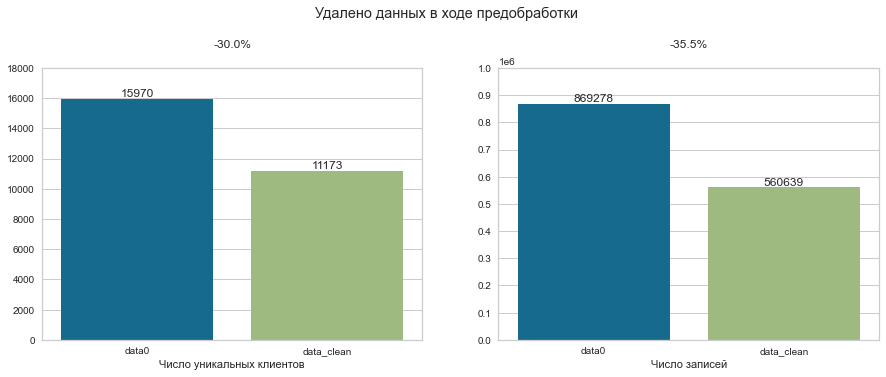

In [79]:
df1=pd.DataFrame({'datasets':['data0', 'data_clean'],
              'amount_of_unique_clients':[data0.client_id.nunique(), data_clean.client_id.nunique()]})
df2=pd.DataFrame({'datasets':['data0', 'data_clean'],
              'amount_of_events':[data0.shape[0], data_clean.shape[0]]})
df1['%'] = round(df1.amount_of_unique_clients * 100 / df1.amount_of_unique_clients[0], 1)
df2['%'] = round(df2.amount_of_events * 100 / df2.amount_of_events[0], 1)

fig,ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('Удалено данных в ходе предобработки', y=1.05)

ax0 = sns.barplot(data=df1, x='datasets', y='amount_of_unique_clients', ax=ax[0])
ax0.bar_label(ax[0].containers[0])
ax0.set_yticks(range(0,19000,2000))
ax0.set_title(f"{round(df1['%'][1] - df1['%'][0], 1)}%", pad=20)
ax0.set_xlabel('Число уникальных клиентов')
ax0.set_ylabel('')

ax1 = sns.barplot(data=df2, x='datasets', y='amount_of_events', ax=ax[1])
ax1.bar_label(ax[1].containers[0])
ax1.set_yticks(range(0,1000001,100000))
ax1.set_title(f"{round(df2['%'][1] - df2['%'][0], 1)}%", pad=20)
ax1.set_xlabel('Число записей')
ax1.set_ylabel('')

plt.show()


### 1.3. Разделение событий на сессии, расчет связанных статистик

Перед началом анализа событий создадим новый датасет и разделим события на сессии.

In [80]:
#отсортируем события по времени и проставим новые индексы
data_clean_full = data_clean.sort_values(['event_dttm'], ignore_index=1)
#сгруппируем по client_id и рассчитаем разницу между соседними событиями в группах
data_clean_full['event_dttm_diff'] = data_clean_full.groupby('client_id').event_dttm.diff().dt.total_seconds() / 60
#отсортируем по клиенту и времени события и делаем колонку с индексом рабочей
data_clean_full = data_clean_full.sort_values(['client_id','event_dttm']).reset_index()
#назначим id сессии только первым событиям сессий по условию: либо нет предыдущих событий, либо разница более 30 мин
#остальные события пометим nan, чтобы потом заполнить их значениями session_id первых событий
#в качестве id сессии используем индекс строки
data_clean_full['session_id'] = data_clean_full.apply(lambda x: 
                                                      x['index'] if any([x.event_dttm_diff != x.event_dttm_diff, 
                                                      x.event_dttm_diff > 30]) else np.nan, 1)
#протягиваем session_id на все события, заполняя пропуски, корректируем формат на int и удаляем колонку с индексом
data_clean_full['session_id'] = data_clean_full.session_id.fillna(method='ffill')
data_clean_full['session_id'] = data_clean_full['session_id'].astype('int')
data_clean_full = data_clean_full.drop(columns='index')

In [81]:
pd.DataFrame(data_clean_full[['client_id','account_id','session_id']].nunique()).reset_index()\
.rename(columns={'index':'cat', 0:'amount'})

cat  amount
0   client_id   11173
1  account_id   11877
2  session_id   31156

In [82]:
#также проставим номера шагов в общем маршруте и в отдельной сессии
data_clean_full['num_step_in_full_CJM'] = data_clean_full.groupby('client_id').cumcount() + 1
data_clean_full['num_step_in_session'] = data_clean_full.groupby('session_id').cumcount() + 1
#и пронумеруем сессии
data_clean_full['num_session'] = data_clean_full.num_step_in_session.apply(lambda x: x if x == 1 else 0)
data_clean_full['num_session'] = data_clean_full.groupby('client_id').num_session.cumsum().astype('int')

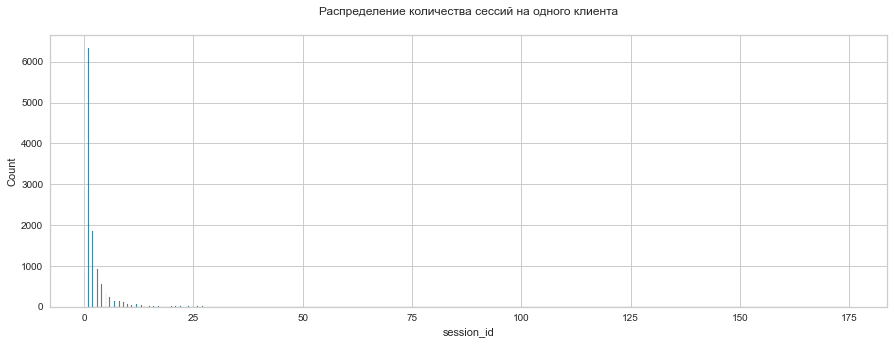

In [83]:
plt.figure(figsize=(15,5))
sns.histplot(data=data_clean_full.groupby('client_id', as_index=False).agg({'session_id':'nunique'}), x='session_id')
plt.title('Распределение количества сессий на одного клиента', pad=20)
plt.show()

In [84]:
data_clean_full.groupby('client_id', as_index=False).agg({'session_id':'nunique'}).session_id\
.quantile([0,0.5,0.80,0.95,1])

0.00      1.0
0.50      1.0
0.80      3.0
0.95      9.0
1.00    175.0
Name: session_id, dtype: float64

За период эксперимента половина клиентов провела на платформе лишь одну сессию, 80% уложились в 3 сессии. Максимальное число сессий составило 175.

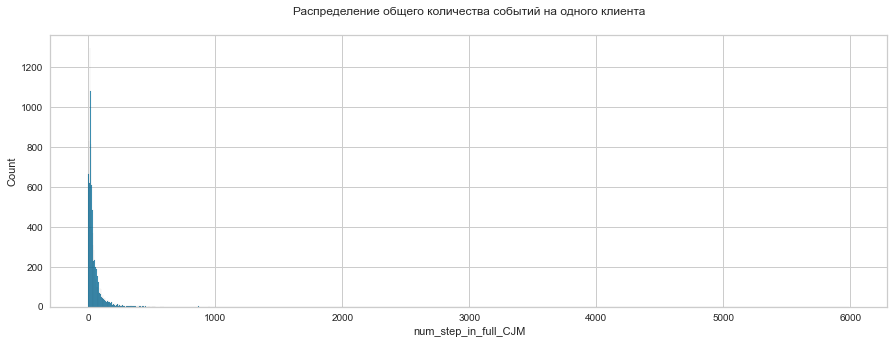

In [85]:
plt.figure(figsize=(15,5))
sns.histplot(data=data_clean_full.groupby('client_id', as_index=0).agg({'num_step_in_full_CJM':'max'}), 
             x='num_step_in_full_CJM')
plt.title('Распределение общего количества событий на одного клиента', pad=20)
plt.show()

In [86]:
data = data_clean_full.groupby('client_id', as_index=0).agg({'num_step_in_full_CJM':'max'})
data.num_step_in_full_CJM.quantile([0,0.5,0.8,0.95,1])

0.00       1.0
0.50      24.0
0.80      65.0
0.95     167.0
1.00    5993.0
Name: num_step_in_full_CJM, dtype: float64

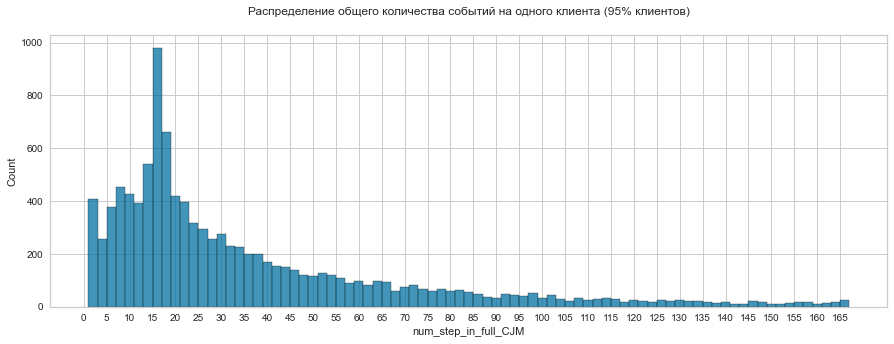

In [87]:
plt.figure(figsize=(15,5))
sns.histplot(data=data.query('num_step_in_full_CJM <= 167'), x='num_step_in_full_CJM', binwidth=2)
plt.xticks(range(0,170,5))
plt.title('Распределение общего количества событий на одного клиента (95% клиентов)', pad=20)
plt.show()

Половина клиентов уложилась в 24 шага за весь CJM, 80% сделали не более 65 шагов.

In [88]:
data = data_clean_full.groupby('session_id', as_index=0).agg({'num_step_in_session':'max'})
data.num_step_in_session.quantile([0,0.5,0.8,0.95,1])

0.00       1.0
0.50       8.0
0.80      26.0
0.95      67.0
1.00    1028.0
Name: num_step_in_session, dtype: float64

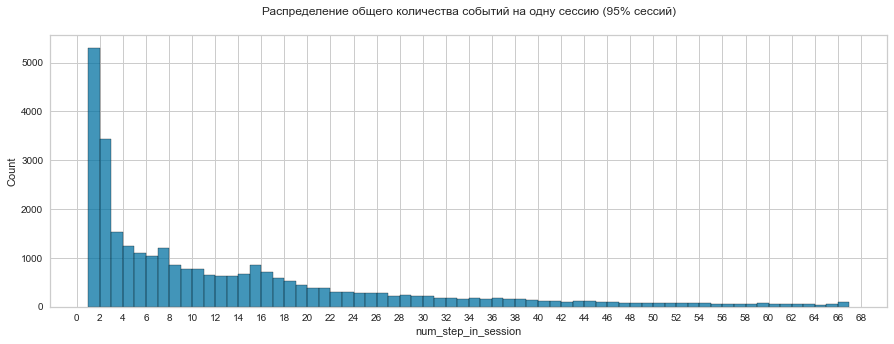

In [89]:
plt.figure(figsize=(15,5))
sns.histplot(data=data.query('num_step_in_session <= 67'), x='num_step_in_session', binwidth=1)
plt.xticks(range(0,70,2))
plt.title('Распределение общего количества событий на одну сессию (95% сессий)', pad=20)
plt.show()

Половина сессий составила не более 8 шагов, в 80% сессий пользователи сделали не более 26 шагов.

In [90]:
data = data_clean_full.groupby(['client_id', 'num_session'], as_index=0).agg({'event_dttm':['min','max']})
data.columns = [(col[0] + '_' + col[1]).strip('_') for col in list(data.columns)]
data['session_duration'] = (data.event_dttm_max - data.event_dttm_min).dt.total_seconds() / 60
df1 = data.groupby('client_id', as_index=0).agg({'session_duration':'sum'})
df1.session_duration.quantile([0,0.5,0.8,0.95,1]).round()

0.00       0.0
0.50       9.0
0.80      43.0
0.95     144.0
1.00    4696.0
Name: session_duration, dtype: float64

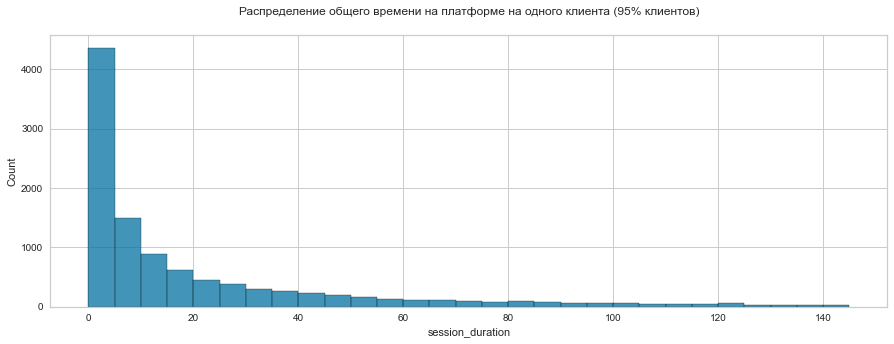

In [91]:
plt.figure(figsize=(15,5))
sns.histplot(data=df1.query('session_duration <= 143.6'), x='session_duration', binwidth=5)
#plt.xticks(range(0,170,5))
plt.title('Распределение общего времени на платформе на одного клиента (95% клиентов)', pad=20)
plt.show()

Половина клиентов уложилась в 9 минут на весь CJM, 80% - в 43 минуты.

Теперь разберемся до конца с событиями todo_list_item.

In [92]:
to_do_sessions = data_clean_full[data_clean_full.event_name.apply(lambda x: x.split('.')[0]) == 'todo_list_item']\
.session_id.unique()
round(data_clean_full.query('session_id in @to_do_sessions').event_name.apply(lambda x: x.split('.')[0])\
.value_counts(normalize=True).mul(100),1)

web               78.1
todo_list_item    16.8
mobile             5.1
Name: event_name, dtype: float64

В сессиях с событиями класса todo_list_item соседствуют события как класса web, так и класса mobile.

Посмотрим, какие события были в сессиях перед событиями класса todo_list_item.

In [93]:
s = data_clean_full.iloc[:, -7::]
s['event_name_class'] = s.event_name.apply(lambda x: x.split('.')[0])
s['event_name_prev'] = s.groupby('session_id').event_name.shift(1)
s['event_name_class_prev'] = s.event_name_prev.apply(lambda x: x.split('.')[0] if x == x else 'NO_PREV_EVENTS')
s = s.iloc[:,[0,7,8,9] + list(range(1,7))]

s = pd.DataFrame(round(s.query('event_name_class == "todo_list_item" & event_name_class_prev != "todo_list_item"')\
.event_name_prev.value_counts(normalize=1).mul(100), 2)).reset_index()\
.rename(columns={'event_name_prev':'%','index':'event_name_prev'})
s['%cum'] = s['%'].cumsum()
s.head(10)

event_name_prev      %   %cum
0                       web.home_tab.todo_list.shown  37.95  37.95
1  web.page_questionnaire.todo_list_personalizati...  34.24  72.19
2        web.home_tab.todo_list.progress_modal.shown  16.55  88.74
3                  web.interface.dashboard.page_view   6.11  94.85
4                    web.dashboard.product_tips.show   1.14  95.99
5                    web.interface.settings.pageview   0.66  96.65
6                                web.onboarding.skip   0.60  97.25
7                              web.page_view.content   0.45  97.70
8                        web.builder.publish_attempt   0.33  98.03
9                   web.page_view.installed_template   0.28  98.31

Как и предполагалось, события класса todo_list_item являются выделенной подгруппой в иерархии событий - они никогда не стоят первыми в сессии, и в абсолютном большинстве случаев им предшествуют события класса web, в структуре имен которых фигурируют блоки todo_list (89%) или прочие указатели на посказки и помощь. Отлегло.

Таким образом, предварительная обработка данных завершена.

### 1.4. Обзор соотношений категориальных признаков по всем клиентам

Рассмотрим данные клиентов по различным срезам.

In [94]:
data_clean_full.drop_duplicates(subset='client_id').ig_followerscount.quantile([0,0.25,0.5,0.75,1])

0.00           0.0
0.25         153.0
0.50         702.0
0.75        2546.0
1.00    11681862.0
Name: ig_followerscount, dtype: float64

In [95]:
data_clean_full.drop_duplicates(subset='client_id').sort_values('ig_followerscount', ascending=0)\
.ig_followerscount.head(10)

46926     11681862.0
484257     2266715.0
470348     1181260.0
289526     1004641.0
305108      936116.0
107069      900175.0
521231      833698.0
264686      552337.0
158153      523294.0
468281      511458.0
Name: ig_followerscount, dtype: float64

По количеству подписчиков явных аномалий нет. Хотя есть звездные клиенты.

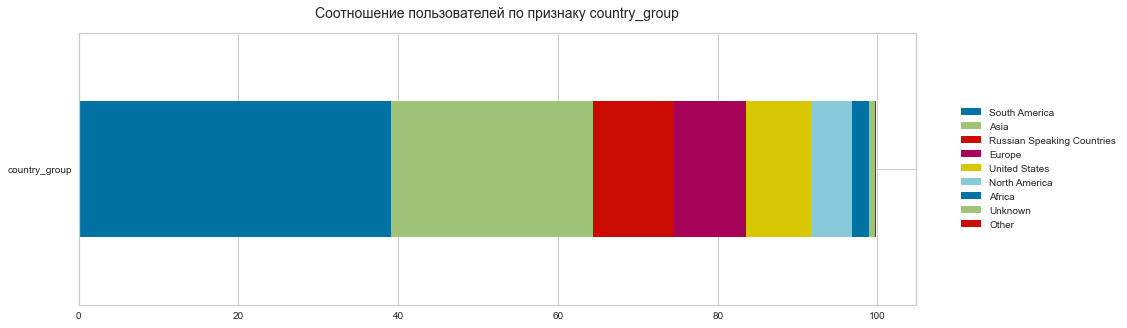

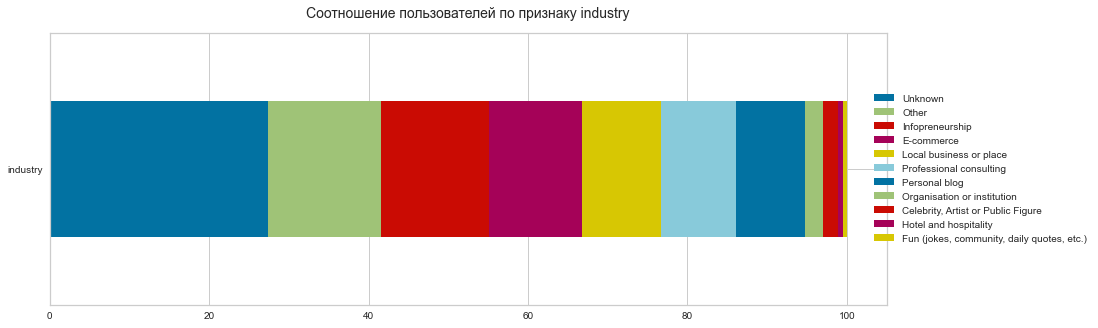

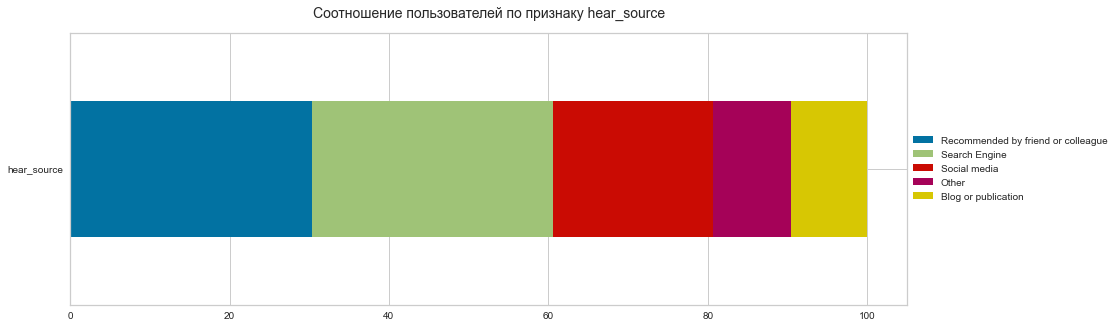

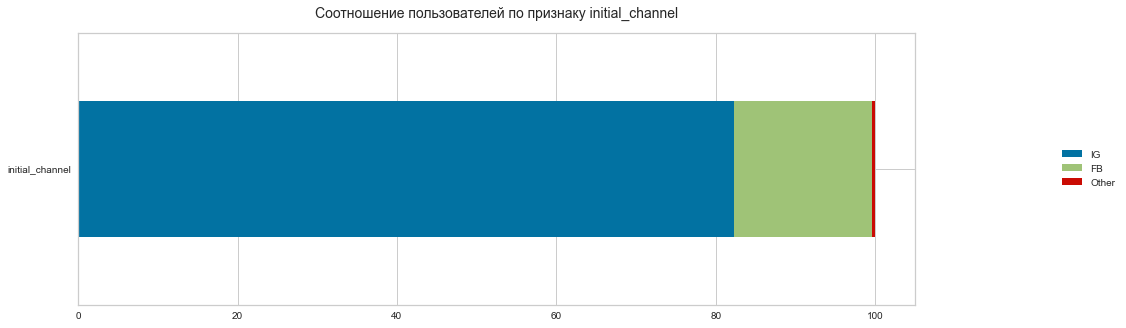

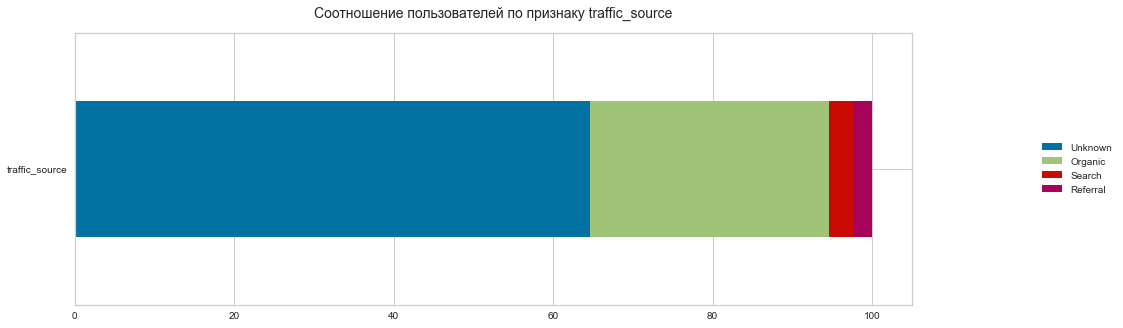

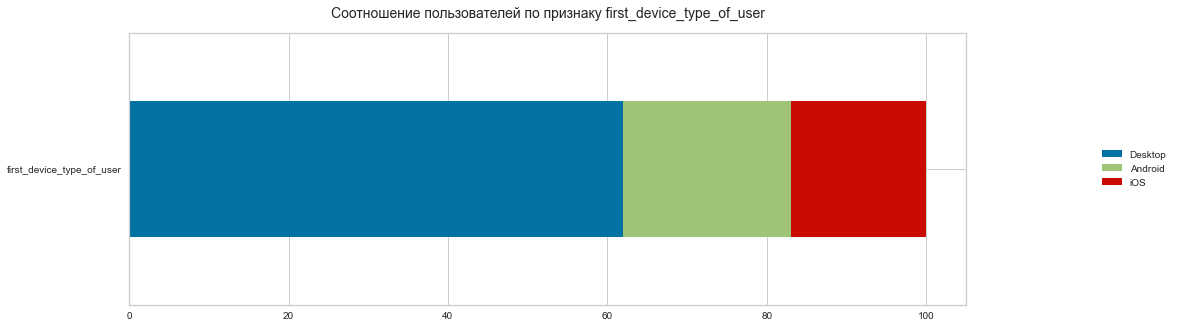

<Figure size 576x396 with 0 Axes>

In [96]:
col_list = ['country_group','industry','hear_source','initial_channel','traffic_source','first_device_type_of_user']
for col in col_list:
    ax = pd.DataFrame(data_clean_full.drop_duplicates(subset='client_id')[col].value_counts(normalize=1)
             .mul(100).round(1)).T\
    .plot(kind='barh', stacked=True, figsize=(15,5))

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(bbox_to_anchor=(1.25,0.5), loc="right")
    plt.xlabel('')
    plt.title(f'Соотношение пользователей по признаку {col}', fontsize=14, pad=15)
    plt.show()
plt.tight_layout()

1. Большинство пользователей из Южной Америки (\~40%) и Азии (\~25%), на третьем месте - русскоговорящие страны (~10%).
2. Самыми популярными индустриями стали инфопредпринимательство и электронная коммерция (в сумме ~25%), большинство пользователей выбрало Прочее в этой графе.
3. По источнику узнавания лидируют сарафанное радио, поисковые выдачи - примерно по 30%, и соцсети (~20%)
4. По источнику трафика мало данных, но по тем, что есть, лидирует органика (~30%).
5. Десктоп стал самым популярным первым устройством пользователей (~60%), доля мобильных платформ в сумме составляет ~40%, соотношение между ними примерно равное.

## 2. Анализ поведения пользователей

In [97]:
data_clean_full.event_name.nunique()

320

Далее нам предстоит разбиение пользователей на кластеры по их CJM с помощью библиотеки [Retentioneering](https://retentioneering.github.io/retentioneering-tools/_build/html/clustering.html). 

Заложенный там алгоритм кластеризации предполагает представление пользовательских путей в виде векторов или набора измерений, где каждое измерение является отдельным событием.

После преобразования данных в CJM пользователей осталось 320 уникальных событий. Некоторые события связаны друг с другом иерархически и по смыслу. 

In [98]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = sankey_labels,
      color = "blue"
    ),
    link = dict(
      source = list(sankey_df.query('Value > 1000').Source), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = list(sankey_df.query('Value > 1000').Target),
      value = list(sankey_df.query('Value > 1000').Value)
  ))])

fig.update_layout(title_text="Структура связей иерархических блоков в событиях, которые встречались более 1000 раз \
(94.4% количества всех связей)", 
                  font_size=10, autosize=False, width=970, height=1000)
fig.show()

Для более точного разбиения на кластеры целесообразно сократить размерность событий, объединив сходные по смыслу события в небольшие группы (кластеры).

### 2.1. Кластеризация уникальных названий событий по смысловым группам

Для объединения событий по смыслу представим все слова в названиях событий в виде текста с пробелами и воспользуемся методами обработки естественного языка. 

Далее произведем кластеризацию по общим словам в соответствии с их расчетным весом, подобные алгоритмы нередко используют для классификации товаров по названию или описанию.

In [99]:
event_names_clustered = pd.DataFrame({'event_name':data_clean_full.event_name.unique()})

Для общего анализа пользовательского поведения и разбиения пользователей на более-менее весомые кластеры нам важно понять, по каким разделам сайта перемещался пользователь и как много действий в этих разделах совершил. Информацией о том, какие именно действия совершались в этих разделах, а также детализацией до элемента интерфейса можно пренебречь.

In [100]:
event_names_clustered[event_names_clustered.event_name.apply(lambda x: len(re.split('\\.|__',x))) > 3].head()

event_name
0   web.page_questionnaire.todo_list_personalizati...
3                   web.interface.dashboard.page_view
4                        web.home_tab.todo_list.shown
9           mobile.automations_list__builder__clicked
14        web.home_tab.todo_list.progress_modal.shown

In [101]:
event_names_clustered[event_names_clustered.event_name.apply(lambda x: len(re.split('\\.|__',x))) <= 3].head()

event_name
1          todo_list_item.verify_email.done
2    todo_list_item.connect_ig_account.done
5  todo_list_item.try_ig_automation.started
6                  mobile.dialog_list__open
7                     mobile.audience__open

Поэтому "обрежем" иерархически сложные события, состоящие из 4 и более блоков до первых 3 блоков, а события, состоящие из 3 блоков - до первых 2.

Таким образом мы уберем информацию о конкретных действиях пользователей, которые чаще всего находятся в последнем блоке, и сократим число уровней иерархии для избыточно детализированных событий.

Одновременно с этим заменим все разделители на пробелы для дальнейшей обработки.

In [102]:
event_names_clustered['event_name_text'] = event_names_clustered.event_name\
.apply(lambda x: '.'.join(re.split('\\.|__',x)[0:3]) if len(re.split('\\.|__',x)) > 3 
       else '.'.join(re.split('\\.|__',x)[0:2]))
event_names_clustered['event_name_text'] = event_names_clustered['event_name_text']\
.str.replace('.',' ', regex=0).str.replace('__',' ', regex=0).str.replace('_',' ', regex=0)

In [103]:
event_names_clustered.sort_values('event_name_text', ascending=0).head(15)

event_name  \
299                     web.widgets.enable.limit_error   
257  web.templates.installation.message_tag_modal.o...   
247                  web.templates.installed_protected   
297                                    web.tags.rename   
310  web.sign_in.add_ig_account.modal_unexpected_er...   
298                            web.settings.tag.create   
290          web.settings.set.notification_phone.start   
180               web.settings.remove_ig_account.click   
202                  web.settings.remove_fb_page.click   
40                 web.settings.messenger_section.open   
302         web.settings.invite_new_user.web.ove_error   
234                 web.settings.invite_new_user.click   
235         web.settings.invite_new_user.generate_link   
258   web.settings.invite_new_user.generate_link.error   
39                 web.settings.instagram_section.open   

                    event_name_text  
299              web widgets enable  
257      web templates installation  
247                   web templates  
297                        web tags  
310      web sign in add ig account  
298                web settings tag  
290                web settings set  
180  web settings remove ig account  
202     web settings remove fb page  
40   web settings messenger section  
302    web settings invite new user  
234    web settings invite new user  
235    web settings invite new user  
258    web settings invite new user  
39   web settings instagram section

In [104]:
event_names_clustered.event_name_text.nunique()

155

После этих несложных операций мы уже сократили многообразие событий вдвое, при этом ни сколько не потеряв в смысловой части. Теперь сгруппируем события по общим словам, независимо от их порядка и формы написания.

Метод PorterStemmer() библиотеки nltk обрезает ненужные части слов - окончания и прочее. Например, слова "apple" и "apples" оба станут "appl", таким образом при дальнейшей векторизации по словам они будут одним и тем же измерением.

In [105]:
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

event_names_clustered['event_name_for_cluster'] = event_names_clustered['event_name_text']\
.apply(lambda text: stemSentence(text))

In [106]:
event_names_clustered.sort_values('event_name_for_cluster', ascending=0).head(15)

event_name  \
299                     web.widgets.enable.limit_error   
257  web.templates.installation.message_tag_modal.o...   
247                  web.templates.installed_protected   
297                                    web.tags.rename   
310  web.sign_in.add_ig_account.modal_unexpected_er...   
298                            web.settings.tag.create   
290          web.settings.set.notification_phone.start   
180               web.settings.remove_ig_account.click   
202                  web.settings.remove_fb_page.click   
40                 web.settings.messenger_section.open   
302         web.settings.invite_new_user.web.ove_error   
234                 web.settings.invite_new_user.click   
235         web.settings.invite_new_user.generate_link   
258   web.settings.invite_new_user.generate_link.error   
39                 web.settings.instagram_section.open   

                    event_name_text      event_name_for_cluster  
299              web widgets enable            web widget enabl  
257      web templates installation          web templat instal  
247                   web templates                 web templat  
297                        web tags                     web tag  
310      web sign in add ig account  web sign in add ig account  
298                web settings tag                 web set tag  
290                web settings set                 web set set  
180  web settings remove ig account    web set remov ig account  
202     web settings remove fb page       web set remov fb page  
40   web settings messenger section     web set messeng section  
302    web settings invite new user      web set invit new user  
234    web settings invite new user      web set invit new user  
235    web settings invite new user      web set invit new user  
258    web settings invite new user      web set invit new user  
39   web settings instagram section   web set instagram section

Далее представим каждое из предобработанных названий событий в виде набора координат для вектора. Координатами будут все уникальные слова, из которых состоят названия предобработанных событий, с учетом частоты их встречаемости среди всех названий событий.

In [107]:
vectorizer = TfidfVectorizer(analyzer='word')
X = vectorizer.fit_transform(event_names_clustered.event_name_for_cluster).toarray()

In [108]:
len(X), len(X[0])

(320, 161)

Оригинальные 320 событий разложены по 161 уникальному составляющему. Ниже представлены как раз эти уникальные составляющие.

In [109]:
vectorizer.get_feature_names_out()

array(['accept', 'account', 'action', 'add', 'addtrigg', 'agent',
       'analyt', 'and', 'answer', 'audienc', 'autom', 'avatar', 'banner',
       'bar', 'behavior', 'bot', 'broadcast', 'builder', 'bulk', 'button',
       'campaign', 'card', 'cgt', 'channel', 'chat', 'checker', 'choos',
       'common', 'condit', 'confirm', 'connect', 'connector', 'content',
       'convers', 'creat', 'custom', 'danger', 'dashboard', 'default',
       'delet', 'detail', 'dialog', 'disabl', 'do', 'dropdown', 'edit',
       'email', 'empti', 'enabl', 'engag', 'error', 'fb', 'featur',
       'field', 'filter', 'first', 'float', 'folder', 'from', 'home',
       'host', 'ig', 'in', 'increas', 'info', 'input', 'instagram',
       'instal', 'interfac', 'invit', 'item', 'json', 'keyword', 'land',
       'leav', 'list', 'live', 'mention', 'menu', 'messag', 'messeng',
       'mobil', 'modal', 'multi', 'my', 'new', 'next', 'node', 'notif',
       'on', 'onboard', 'opt', 'organ', 'other', 'overlay', 'page',
      

Метод кластеризации K-means распределяет точки данных в дискретные группы на основе их сходства или близости друг к другу. Мы указываем количество кластеров K, и алгоритм итеративно присваивает каждое наблюдение кластеру до тех пор, пока наблюдения каждого кластера не будут как можно ближе к его среднему значению (или центроиду).

Но для начала определим оптимальное количество кластеров (укрупненных названий событий) с помощью "метода локтя".

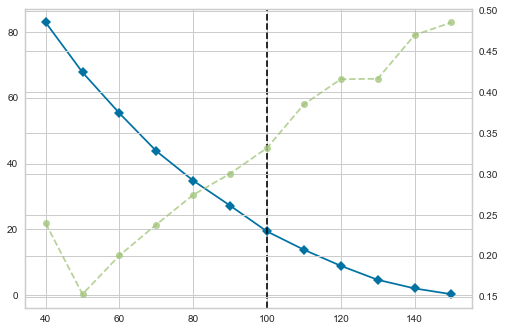

In [110]:
elbow = KElbowVisualizer(KMeans(), k=np.arange(40,160,10))
elbow.fit(X)
plt.show()

In [111]:
kmeans = KMeans(n_clusters=90)
kmeans.fit(X)
result = pd.concat([event_names_clustered['event_name_for_cluster'],pd.DataFrame(X,\
columns=vectorizer.get_feature_names_out())],axis=1)
result['cluster'] = kmeans.predict(X)

События распределены по кластерам — сейчас это числа от 0 до 89. Представим наши кластеры в виде набора текстовых тегов. Мы можем сделать это автоматически, извлекая имена столбцов матрицы со значением > 0 для каждой строки в каждом кластере. Таким образом, мы можем увидеть слова, которые являются общими для всех названий событий в кластере - получатся наборы тегов.

In [112]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) 
                      if x and x!='event_name_for_cluster' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')
result_labelled.head()

event_name_for_cluster  accept   account  action  add  \
0  web page questionnair todo list person     0.0  0.000000     0.0  0.0   
1             todo list item verifi email     0.0  0.000000     0.0  0.0   
2       todo list item connect ig account     0.0  0.487263     0.0  0.0   
3                  web interfac dashboard     0.0  0.000000     0.0  0.0   
4                  web home tab todo list     0.0  0.000000     0.0  0.0   

   addtrigg  agent  analyt  and  answer  audienc  autom  avatar  banner  bar  \
0       0.0    0.0     0.0  0.0     0.0      0.0    0.0     0.0     0.0  0.0   
1       0.0    0.0     0.0  0.0     0.0      0.0    0.0     0.0     0.0  0.0   
2       0.0    0.0     0.0  0.0     0.0      0.0    0.0     0.0     0.0  0.0   
3       0.0    0.0     0.0  0.0     0.0      0.0    0.0     0.0     0.0  0.0   
4       0.0    0.0     0.0  0.0     0.0      0.0    0.0     0.0     0.0  0.0   

   ...  trigger  tutori  type  undo  unsav  updat  user  valid    verifi  \
0  ...      0.0     0.0   0.0   0.0    0.0    0.0   0.0    0.0  0.000000   
1  ...      0.0     0.0   0.0   0.0    0.0    0.0   0.0    0.0  0.568153   
2  ...      0.0     0.0   0.0   0.0    0.0    0.0   0.0    0.0  0.000000   
3  ...      0.0     0.0   0.0   0.0    0.0    0.0   0.0    0.0  0.000000   
4  ...      0.0     0.0   0.0   0.0    0.0    0.0   0.0    0.0  0.000000   

   view       web  welcom  widget  cluster  \
0   0.0  0.138749     0.0     0.0       58   
1   0.0  0.000000     0.0     0.0       56   
2   0.0  0.000000     0.0     0.0       23   
3   0.0  0.210135     0.0     0.0       51   
4   0.0  0.171406     0.0     0.0       36   

                                    label  
0  list page person questionnair todo web  
1             email item list todo verifi  
2                       ig item list todo  
3                           dashboard web  
4                  home list tab todo web  

[5 rows x 164 columns]

In [113]:
event_names_clustered = pd.concat([event_names_clustered, result_labelled.label], axis=1)
event_names_clustered.iloc[[random.randint(0,320) for i in range(10)],:]

event_name  \
16                                  web.onboarding.run   
210                            web.page_view.rule_view   
264                   web.broadcast.from_builder.click   
38                     web.interface.settings.pageview   
266                     web.page_view.support_articles   
250            mobile.send_builder__input_bar__success   
75             web.settings.channel_other.section.open   
79   web.settings.channel_other.section.refresh_pho...   
278                 todo_list_item.start_trial.started   
253                  mobile.action_sheet__clear_filter   

                   event_name_text        event_name_for_cluster  \
16                  web onboarding                   web onboard   
210                  web page view                 web page view   
264     web broadcast from builder    web broadcast from builder   
38          web interface settings              web interfac set   
266                  web page view                 web page view   
250  mobile send builder input bar  mobil send builder input bar   
75      web settings channel other         web set channel other   
79      web settings channel other         web set channel other   
278     todo list item start trial    todo list item start trial   
253            mobile action sheet            mobil action sheet   

                            label  
16                    onboard web  
210                 page view web  
264                 broadcast web  
38               interfac set web  
266                 page view web  
250  bar builder input mobil send  
75                channel set web  
79                channel set web  
278    item list start todo trial  
253            action mobil sheet

Кластеризация событий завершена. Вместо 320 уникальных событий получено 90 наборов тегов, сгруппированных по смысловым блокам.

### 2.2. Кластеризация пользователей по CJM в первую сессию, описание кластеров

Подготовим данные для кластеризации, подтянув полученные наборы тегов для каждого события.

In [114]:
data_for_final_clustering = data_clean_full.iloc[:,[2]+list(range(-7,0,1))]\
.merge(event_names_clustered[['event_name','label']],on='event_name', how='left')\
.rename(columns = {'label':'event_cluster_label'})
data_for_final_clustering.head()

client_id                                         event_name  \
0     100000  web.page_questionnaire.todo_list_personalizati...   
1     100000                   todo_list_item.verify_email.done   
2     100000                   todo_list_item.verify_email.done   
3     100000             todo_list_item.connect_ig_account.done   
4     100000             todo_list_item.connect_ig_account.done   

                  event_dttm  event_dttm_diff  session_id  \
0 2021-10-05 20:40:49.401840              NaN      151861   
1 2021-10-05 20:41:26.531285     6.188241e-01      151861   
2 2021-10-05 20:41:26.531415     2.166667e-06      151861   
3 2021-10-05 20:41:26.531569     2.566667e-06      151861   
4 2021-10-05 20:41:26.531576     1.166667e-07      151861   

   num_step_in_full_CJM  num_step_in_session  num_session  \
0                     1                    1            1   
1                     2                    2            1   
2                     3                    3            1   
3                     4                    4            1   
4                     5                    5            1   

                      event_cluster_label  
0  list page person questionnair todo web  
1             email item list todo verifi  
2             email item list todo verifi  
3                       ig item list todo  
4                       ig item list todo

Так как общий CJM пользователей может быть сильно запутан, а наша задача - оптимизация онбординга в первую сессию, пока ограничим данные первой сессией.

In [115]:
data = data_for_final_clustering.query('num_session == 1')

Перед кластеризацией посмотрим на варианты пользовательских маршрутов, чтобы выделить общие паттерны для большинства пользователей по хронологии событий. Это поможет в дальнейшей интерпретации соотношений событий в кластерах.

Для этого воспользуемся матрицей шагов, благо библиотека Retentioneering позволяет сделать это в 2 строки.

In [116]:
rete.config.update({
    'user_col': 'client_id',
    'event_col':'event_cluster_label',
    'event_time_col':'event_dttm',
})

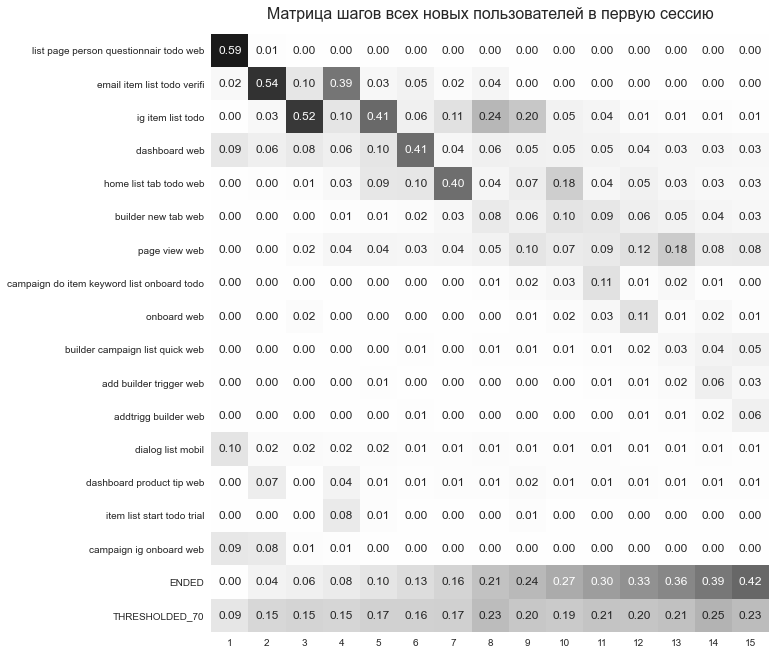

In [117]:
data.rete.step_matrix(max_steps=15, thresh=0.05)
plt.title('Матрица шагов всех новых пользователей в первую сессию', fontsize=16, pad=15)
plt.show()

Слева указаны названия шагов, а снизу - порядковые номера шагов. На пересечении - доля пользователей, перешедших на данное событие на данном шаге.

Мы видим, что на 15 шаге около половины пользователей уже завершили первую сессию. При этом у большиства сессия начинается с опросника (list page person questionnair todo web), подтверждения почты (email item list todo verifi), подключения инстаграм-аккаунта (account connect ig item list todo) и прочих действий в разделе планировщика (тег todo). И все эти начальные действия растягиваются на 8-9 шагов, что составляет половину длины маршрута пользователей, которые отвалились уже на 15 шаге.

Необходимо учесть этот нюанс во время интерпретации поведения кластеров.

Наконец, приступим к кластеризации новых пользователей по CJM в первую сессию с помощью библиотеки Retentioneering.

array([2, 3, 3, ..., 0, 3, 1])

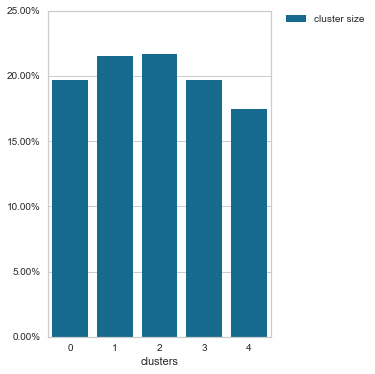

In [118]:
n_clusters = 5

data.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=n_clusters,
                       ngram_range=(1,2),
                       plot_type='cluster_bar')

Количество кластеров подобрано опытным путем, с 4 до 9.

Рассмотрим 15 самых популярных событий в каждом кластере в сравнении со средними значениями по всему массиву.

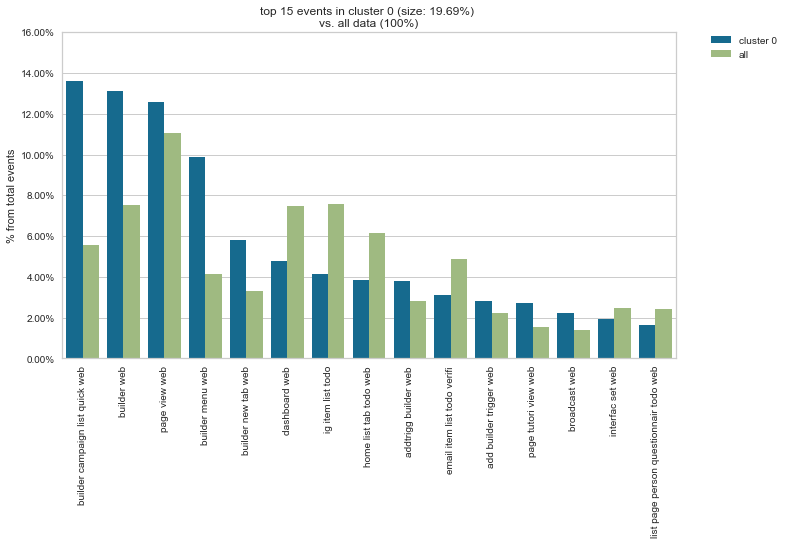

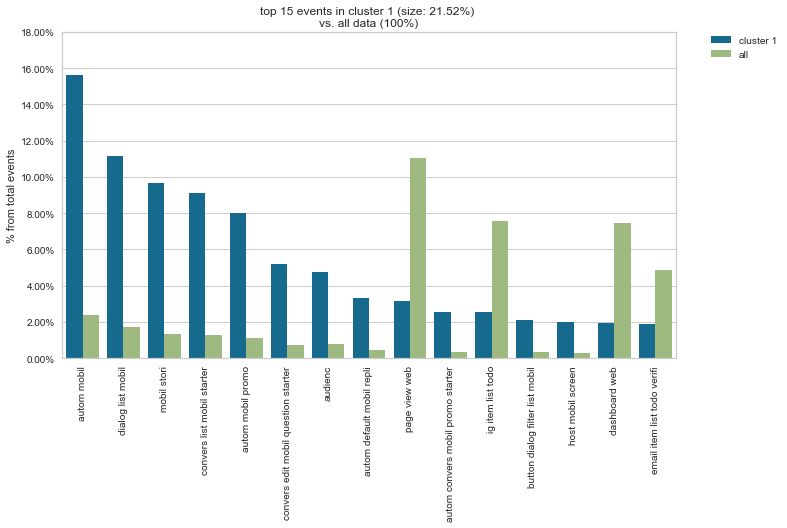

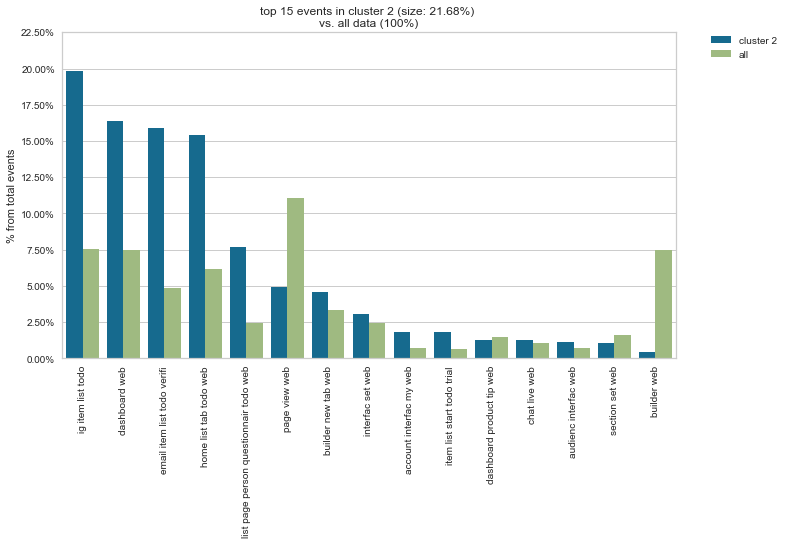

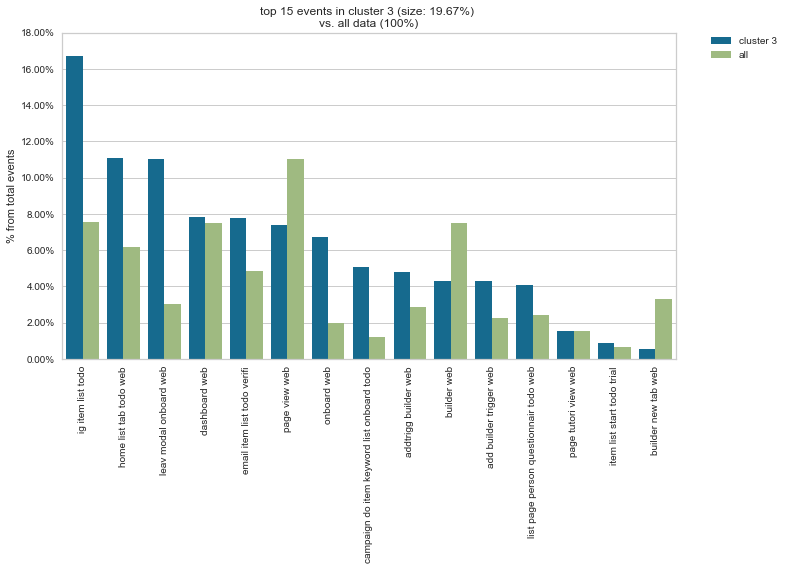

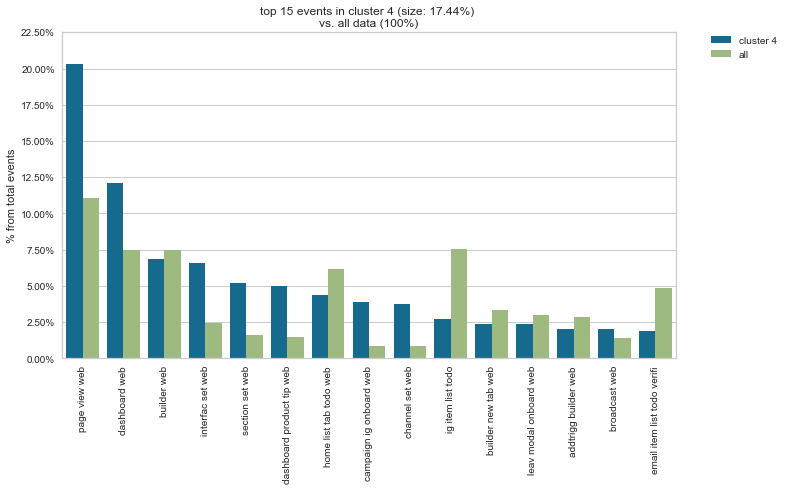

In [119]:
for i in range(n_clusters):
    data.rete.cluster_event_dist(i, top_n=15)

Некоторые кластеры получились довольно богатыми на разнообразные события, однако также есть пара кластеров, где основную долю событий составляют начальные, но мы к этому готовы.

Перед интерперетацией кластеров рассчитаем по каждому из них показатели, характеризующме длительность сессий.

In [120]:
cluster_mapping = pd.DataFrame()
for i in range(n_clusters):
    cluster_mapping = pd.concat([cluster_mapping, pd.DataFrame({'client_id': data.rete.cluster_mapping[i], 
                                                                'client_cluster':i})])
data_clustered = data.merge(cluster_mapping, how='left', on='client_id')
data_clustered.head()

client_id                                         event_name  \
0     100000  web.page_questionnaire.todo_list_personalizati...   
1     100000                   todo_list_item.verify_email.done   
2     100000                   todo_list_item.verify_email.done   
3     100000             todo_list_item.connect_ig_account.done   
4     100000             todo_list_item.connect_ig_account.done   

                  event_dttm  event_dttm_diff  session_id  \
0 2021-10-05 20:40:49.401840              NaN      151861   
1 2021-10-05 20:41:26.531285     6.188241e-01      151861   
2 2021-10-05 20:41:26.531415     2.166667e-06      151861   
3 2021-10-05 20:41:26.531569     2.566667e-06      151861   
4 2021-10-05 20:41:26.531576     1.166667e-07      151861   

   num_step_in_full_CJM  num_step_in_session  num_session  \
0                     1                    1            1   
1                     2                    2            1   
2                     3                    3            1   
3                     4                    4            1   
4                     5                    5            1   

                      event_cluster_label  client_cluster  
0  list page person questionnair todo web               2  
1             email item list todo verifi               2  
2             email item list todo verifi               2  
3                       ig item list todo               2  
4                       ig item list todo               2

Чтобы сравнивать агрегированные показатели кластеров по количеству шагов и длительности между собой, сначала выберем подходящую метрику.

In [121]:
df0 = data_clustered.groupby('client_id', as_index=0).agg({'client_cluster':'max', 'num_step_in_session':'max'})
df0_agg = df0.groupby('client_cluster', as_index=0).agg({'num_step_in_session':['mean','std','median','min','max']})\
.round(1)
df0_agg

client_cluster num_step_in_session                      
                                mean   std median min  max
0              0                49.4  40.3   37.0   6  448
1              1                15.5  18.9   10.0   1  238
2              2                11.2   7.0   10.0   1   65
3              3                23.6  17.9   17.0   5  217
4              4                26.7  33.9   16.0   1  479

Мы видим, что по количеству шагов клиенты внутри кластеров неоднородны - стандартное отклонение во всех кластерах имеет очень высокие значения, а средние значения сильно завышены относительно медиан. Пахнет выбросами и левым смещением распределения.

Убедимся в этом, посмотрев на графики.

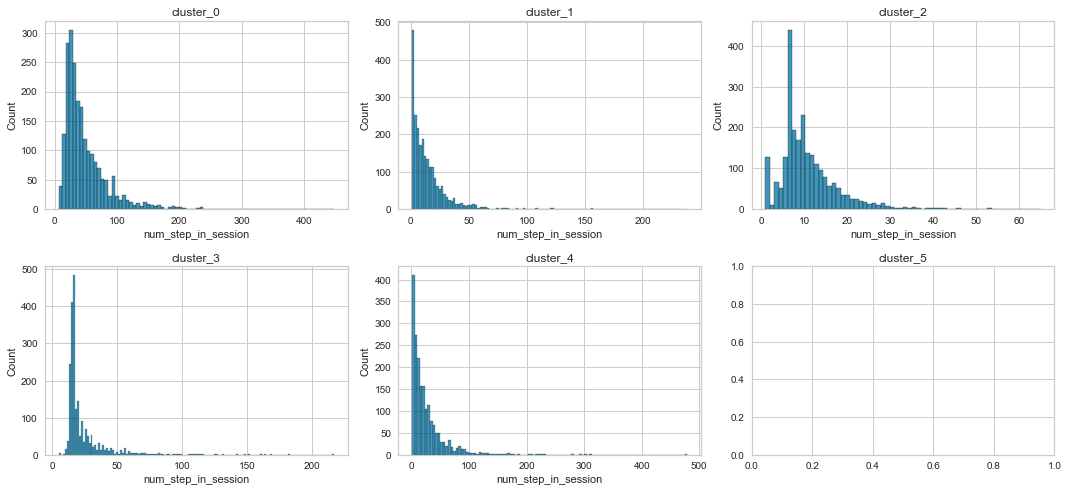

In [122]:
fig,ax = plt.subplots(2,3, figsize=(15,7))
n = 0
for i in range(2):
    for j in range(3):
        df=df0.query('client_cluster == @n')
        sns.histplot(data=df, x=df.num_step_in_session, ax=ax[i][j]).set_title(f'cluster_{n}')
        n+=1
plt.tight_layout()

Как и предполагалось, без удаления выбросов средние значения использовать нельзя.

Рассмотрим аналогичные показатели по временной длительности сессий. Скорее всего, там все аналогично.

In [123]:
df1 = data_clustered.groupby('client_id', as_index=0).agg({'client_cluster':'max','event_dttm':['min','max']})
df1.columns = df1.columns.droplevel()
df1.columns = ['client_id', 'client_cluster', 'start', 'finish']
df1['session_duration'] = (df1['finish'] - df1['start']).dt.total_seconds() / 60
df1_agg = df1.groupby('client_cluster', as_index=0).agg({'session_duration':['mean','std','median','min','max']}).round(1)
df1_agg

client_cluster session_duration                         
                             mean   std median  min    max
0              0             33.2  39.9   17.3  0.2  266.4
1              1              5.8  12.6    1.3  0.0  148.2
2              2              5.5   8.9    1.8  0.0   85.0
3              3              9.8  11.6    5.4  0.5  121.1
4              4             16.8  25.6    7.2  0.0  305.1

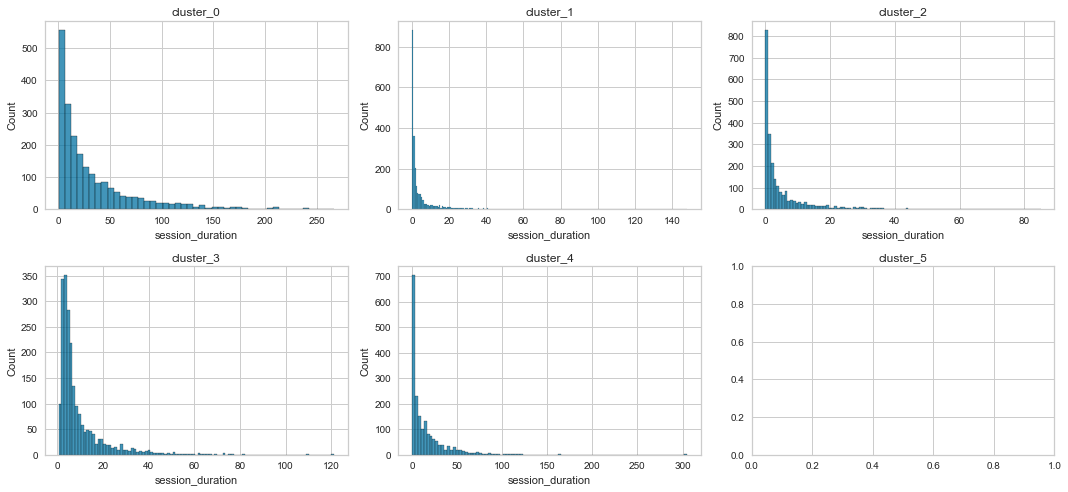

In [124]:
fig,ax = plt.subplots(2,3, figsize=(15,7))
n = 0
for i in range(2):
    for j in range(3):
        df=df1.query('client_cluster == @n')
        sns.histplot(data=df, x=df.session_duration, ax=ax[i][j]).set_title(f'cluster_{n}')
        n+=1
plt.tight_layout()

Собственно, да.

Для сравнения кластеров между собой используем медианы.

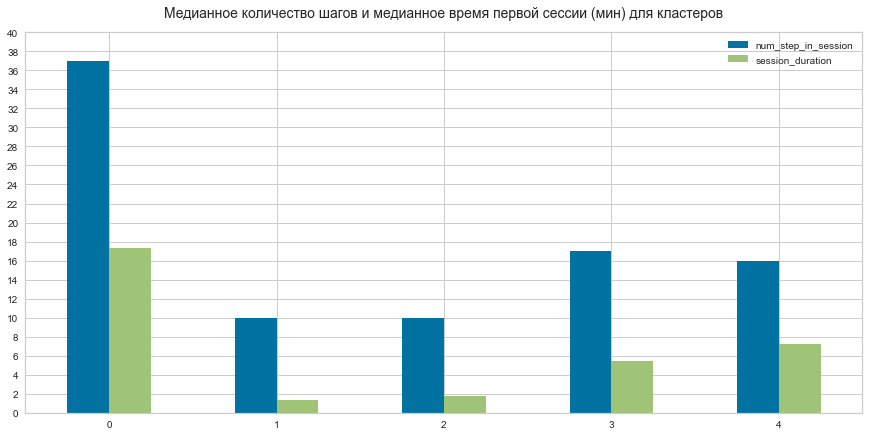

In [125]:
df0 = data_clustered.groupby('client_id', as_index=0).agg({'client_cluster':'max', 'num_step_in_session':'max'})\
.groupby('client_cluster', as_index=0).agg({'num_step_in_session':'median'})

df1 = data_clustered.groupby('client_id', as_index=0).agg({'client_cluster':'max','event_dttm':['min','max']})
df1.columns = df1.columns.droplevel()
df1.columns = ['client_id', 'client_cluster', 'start', 'finish']
df1['session_duration'] = (df1['finish'] - df1['start']).dt.total_seconds() / 60
df1 = df1.groupby('client_cluster', as_index=0).agg({'session_duration':'median'}).round(1)

df=df0.merge(df1, on='client_cluster').drop(labels='client_cluster', axis=1)

df.plot(kind= 'bar', rot=0, figsize=(15,7), yticks=range(0,41,2))
plt.title('Медианное количество шагов и медианное время первой сессии (мин) для кластеров', fontsize=14, pad=15)
plt.show()

Медианное кол-во шагов и длительность сессии значительно различается в кластерах, эта информация будет учтена в описании кластеров в комплексе с другими параметрами - соотношением событий и хронологией шагов.

Процентные соотношения событий в кластерах (топ-15 событий):

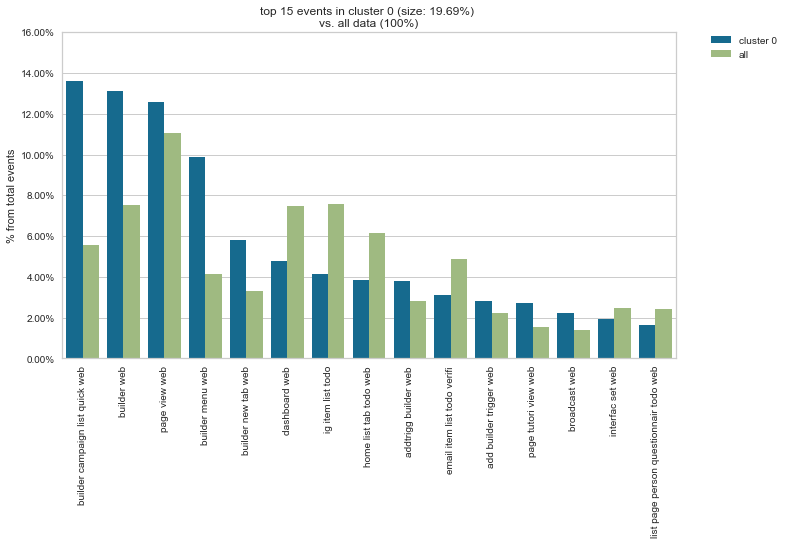

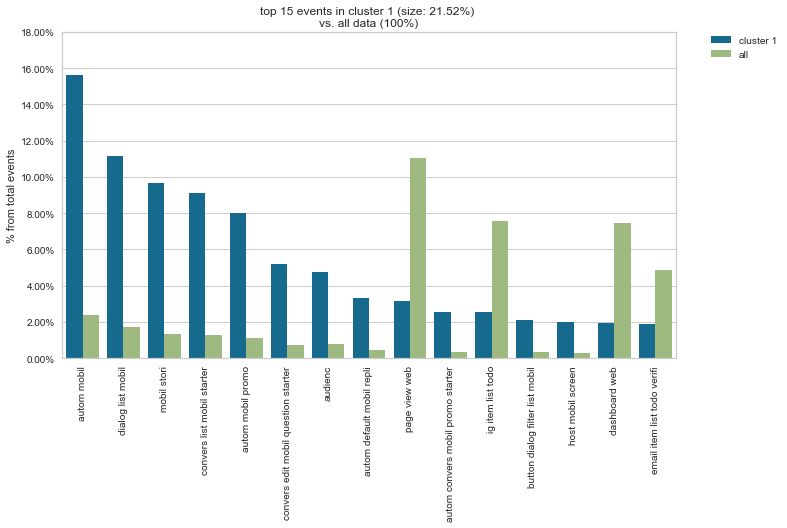

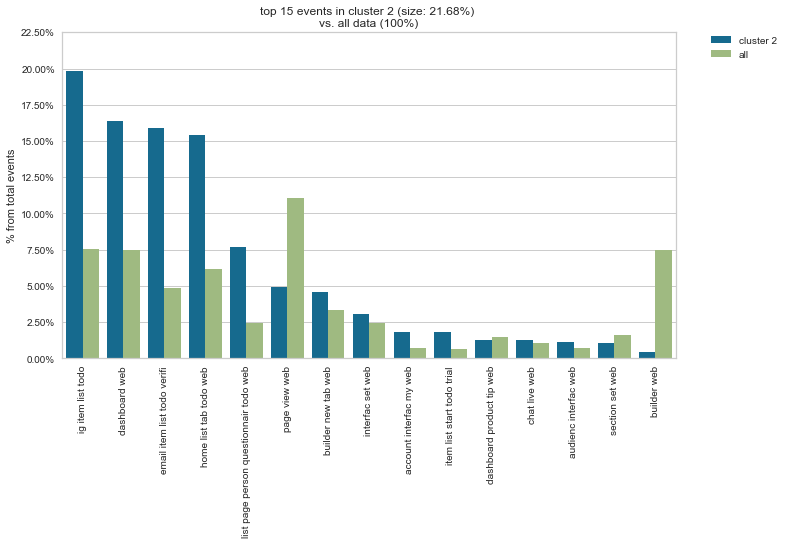

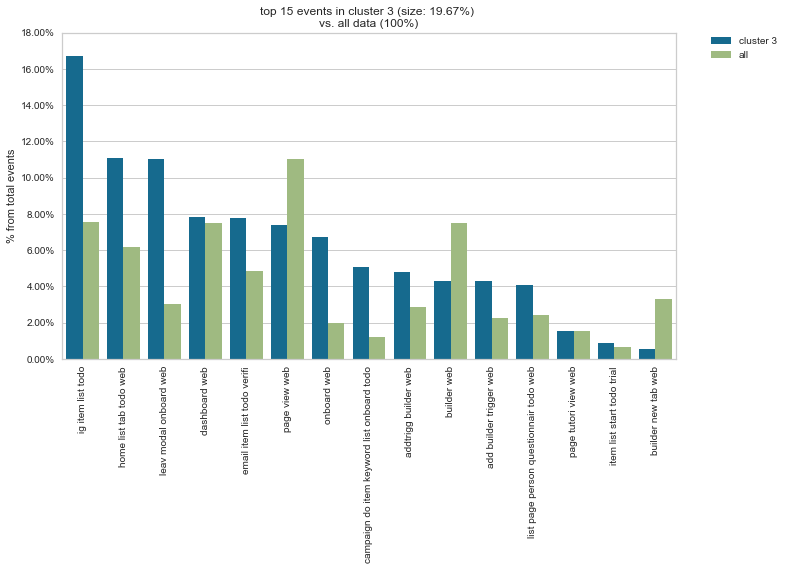

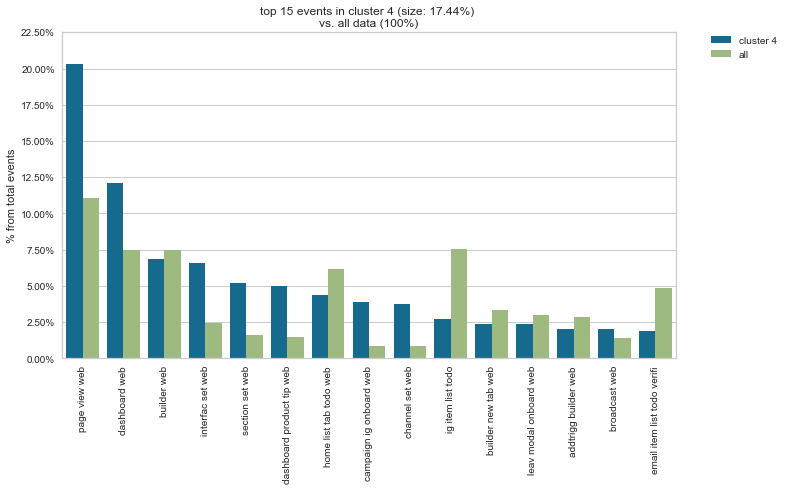

In [126]:
for i in range(n_clusters):
    data.rete.cluster_event_dist(i, top_n=15)

Хронология шагов пользователей по кластерам (первые 15 шагов):

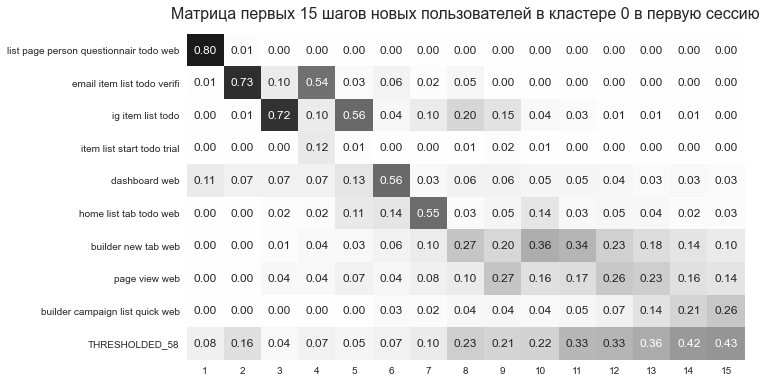

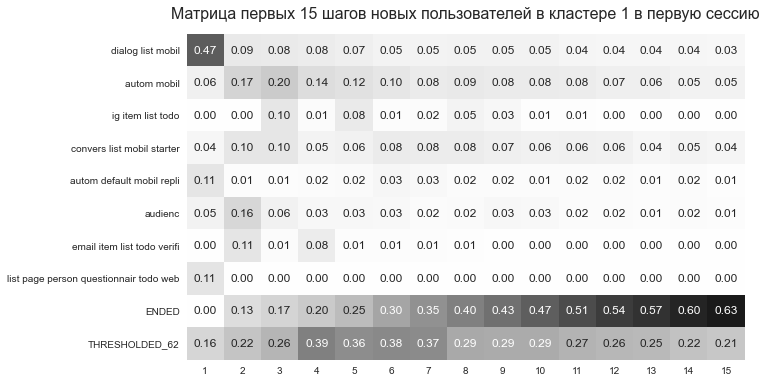

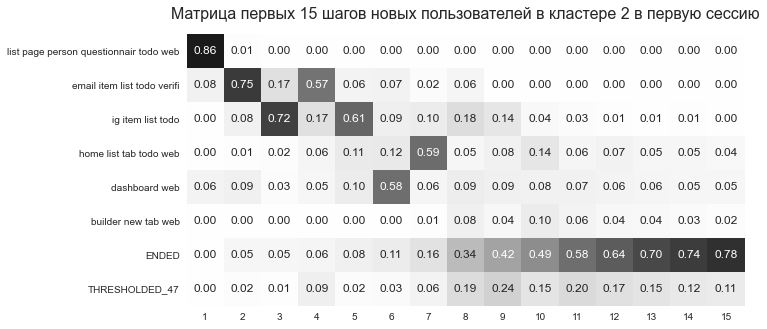

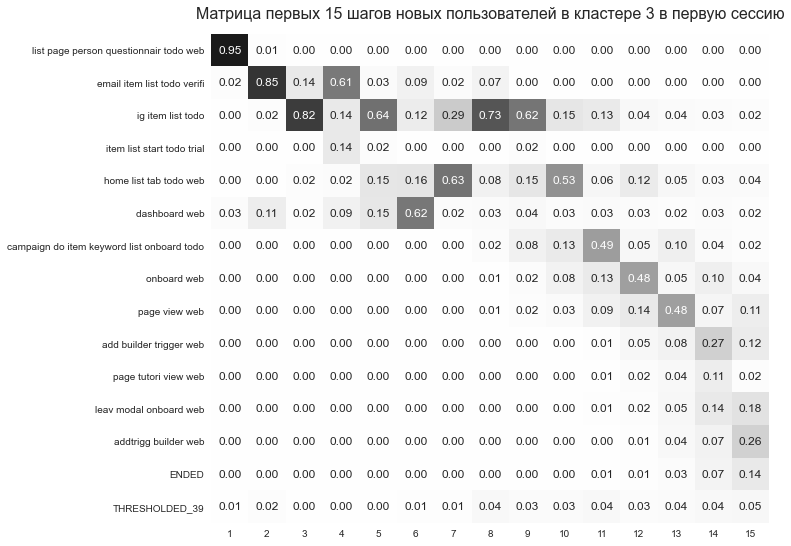

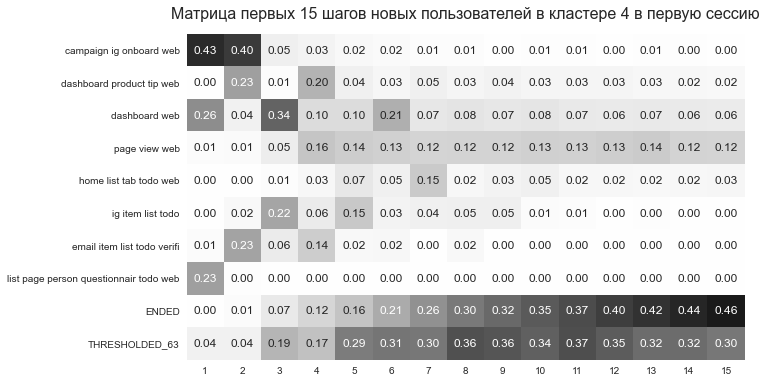

In [127]:
for i in range(n_clusters):
    data_clustered.query('client_cluster == @i').rete.step_matrix(max_steps=15, thresh=0.1)
    plt.title(f'Матрица первых 15 шагов новых пользователей в кластере {i} в первую сессию', fontsize=16, pad=15)
    plt.show()

Опишем кластеры, исходя из полученных данных (далее прикручен мэппинг названий и описаний кластеров по номеру, так как при каждом воспроизвелении кластеризации порядок номеров кластеров менялся).

In [128]:
cluster_mapping = data_clustered.groupby(['client_cluster','event_cluster_label'], as_index=0)\
.agg({'client_id':'count'}).sort_values('client_id', ascending=0).groupby('client_cluster').head(5)\
.groupby('client_cluster', as_index=0).agg({'event_cluster_label':'unique'})\
.rename(columns={'event_cluster_label':'top_5_events'})

In [129]:
def cluster_name(x):
    if str(x).count('mobil') > 2:
        return 'mobile passerby'
    if 'builder' in str(x) and 'campaign' in str(x):
        return 'confident user'
    if 'onboard' in str(x):
        return 'eager learner'
    if 'builder' in str(x) and 'campaign' not in str(x):
        return 'independent researcher'
    if 'email' in str(x) and 'ig' in str(x):
        return 'web passerby'
    else:
        return '???'

In [130]:
cluster_mapping['cluster_name'] = cluster_mapping.top_5_events.apply(lambda x: cluster_name(x))

In [131]:
pd.set_option('display.max_colwidth', 1000)

In [132]:
cluster_mapping = pd.concat([cluster_mapping, 
                             round(data_clustered.drop_duplicates(subset='client_id')
                                   .client_cluster.value_counts(normalize=1).mul(100), 1).sort_index()\
                                   .rename('percent')], axis=1)
cluster_mapping

client_cluster  \
0               0   
1               1   
2               2   
3               3   
4               4   

                                                                                                                      top_5_events  \
0                             [builder campaign list quick web, builder web, page view web, builder menu web, builder new tab web]   
1                                     [autom mobil, dialog list mobil, mobil stori, convers list mobil starter, autom mobil promo]   
2  [ig item list todo, dashboard web, email item list todo verifi, home list tab todo web, list page person questionnair todo web]   
3                  [ig item list todo, home list tab todo web, leav modal onboard web, dashboard web, email item list todo verifi]   
4                                                   [page view web, dashboard web, builder web, interfac set web, section set web]   

             cluster_name  percent  
0          confident user     19.7  
1         mobile passerby     21.5  
2            web passerby     21.7  
3           eager learner     19.7  
4  independent researcher     17.4

In [133]:
cluster_description = {'independent researcher':\
 'Пользователи, которые после прохождения входного опросного листа, подтверждения почты и прочих стандартных стартовых процедур сразу приступают к изучения возможностей платформы (теги page view, dashboard, interface) и созданию бота (различные теги с builder). При этом они не пользуются функционалом быстрого создания бота (тег builder campaign list quick web отсутствует), а предпочитают идти своим маршрутом. Примечательно, что часть из них начинает маршрут с раздела онбординга (тег campaign ig onboard web), однако, судя по отсутствию событий с этим тегом в топе, а также хронологии событий, быстро выходят из этого раздела и приступают к самостоятельному изучению.',\
 'confident user':\
 'Пользователи, которые после прохождения стандартных стартовых процедур сразу приступают к созданию бота с помощью функционала быстрого создания бота (тег builder campaign list quick web лидирует). При этом им удается совершить в среднем (по медиане) больше шагов за менее продолжительный отрезок времени, чем medium-level experts.',\
 'mobile passerby':\
 'Пользователи, которые начинают свой маршрут с мобильной версии платформы (тег mobil), и в рамках первой сессии не делают ничего кроме прохождения стандартных стартовых процедур (чаще всего в мобильном приложении), веб-страницу платформы даже не просматривают.',\
 'web passerby':\
 'Пользователи, которые после прохождения стандартных стартовых процедур тратят пару минут на просмотр сайта и максимум делают начальные шаги по созданию бота (тег builder new tab web), после чего уходят.',\
 'eager learner':\
 'Пользователи, которые после прохождения стандартных стартовых процедур активно используют текущий функционал онбординга (кратное преимущество по событиям с тегом onboard относительно всех пользователей). Однако, в рамках первой сессии успевают сделать меньше шагов и тратят на платформе меньше времени, чем более опытные пользователи из кластеров independent researcher и confident user.'}

In [134]:
print('\033[1m' + 'Описание кластеров.', end='\n\n')
for i in range(n_clusters):
    name=cluster_mapping.cluster_name[i]
    print('\033[1m' + textwrap.fill(f'Кластер {i}. {name} ({cluster_mapping.percent[i]}%). {cluster_description[name]}', 115), 
          end='\n\n')

Описание кластеров.

Кластер 0. confident user (19.7%). Пользователи, которые после прохождения стандартных стартовых процедур сразу
приступают к созданию бота с помощью функционала быстрого создания бота (тег builder campaign list quick web
лидирует). При этом им удается совершить в среднем (по медиане) больше шагов за менее продолжительный отрезок
времени, чем medium-level experts.

Кластер 1. mobile passerby (21.5%). Пользователи, которые начинают свой маршрут с мобильной версии платформы (тег
mobil), и в рамках первой сессии не делают ничего кроме прохождения стандартных стартовых процедур (чаще всего в
мобильном приложении), веб-страницу платформы даже не просматривают.

Кластер 2. web passerby (21.7%). Пользователи, которые после прохождения стандартных стартовых процедур тратят пару
минут на просмотр сайта и максимум делают начальные шаги по созданию бота (тег builder new tab web), после чего
уходят.

Кластер 3. eager learner (19.7%). Пользователи, которые после прохождения стан

Конечно, больше всего нас интересуют eager learners, так как они плотно пользовались текущим функционалом онбординга, и именно их опыт может помочь оптимизировать данный функционал.

Таже интересно узнать, почему часть представителей кластера independent researchers покинула раздел онбординга и переключилась на самостоятельное обучение.

Рассмотрим показатели этих кластеров детальнее.

### 2.3. Сравнение CJM пользователей в первой сессии в выбраных кластерах

Начнем с eager learner.

In [135]:
eager_learner_index = cluster_mapping.query('cluster_name == "eager learner"').index[0]

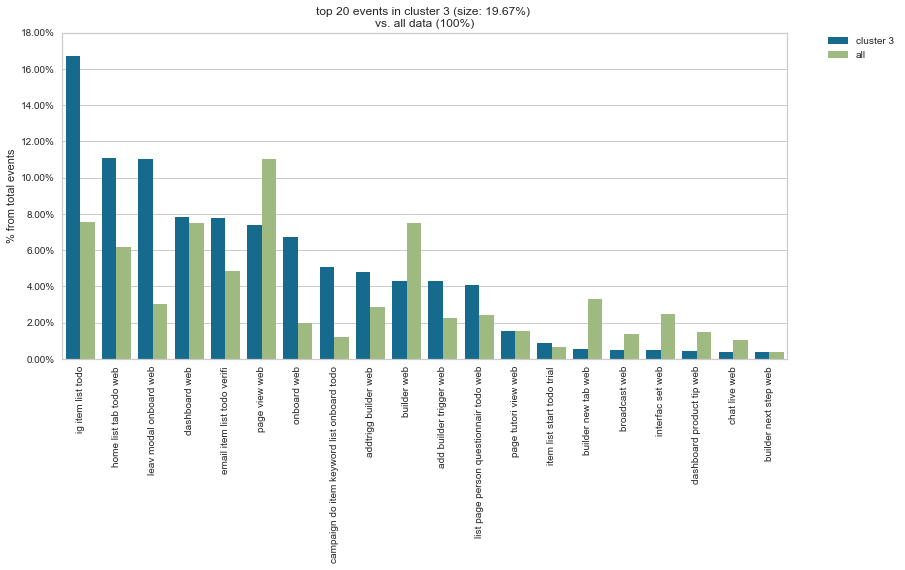

In [136]:
data.rete.cluster_event_dist(eager_learner_index, top_n=20)

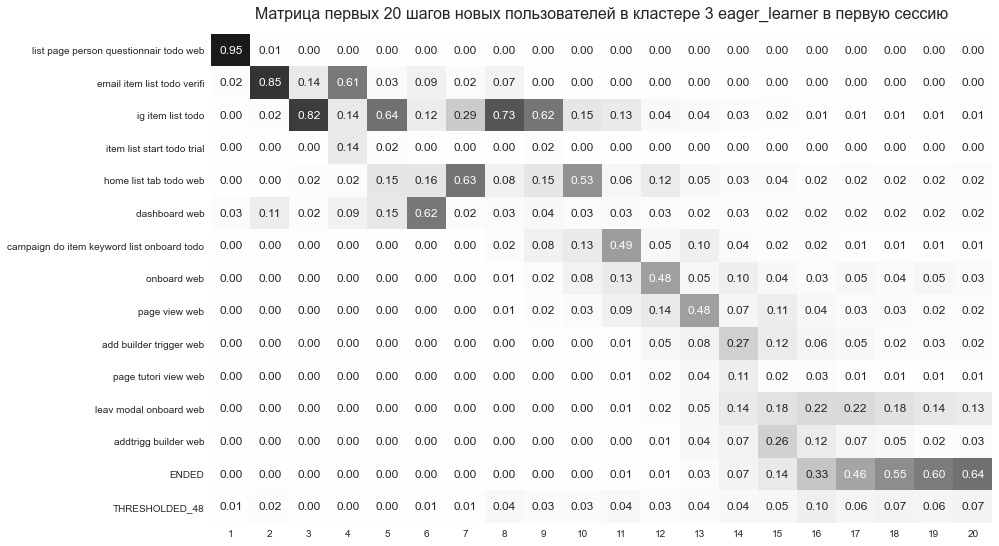

In [137]:
data_clustered.query('client_cluster == @eager_learner_index').rete.step_matrix(thresh=0.1)
plt.title(f'Матрица первых 20 шагов новых пользователей в кластере {eager_learner_index} eager_learner \
в первую сессию', fontsize=16, pad=15)
plt.show()

В общих чертах маршрут eager learner выглядит так:
1. лист опросника (questionare)
2. стандартные процедуры (подтверждение почты email verify, подключение инстаграм-аккаунта ig connect)
3. изучение разделов планировщика и общих разделов сайта (todo list, dashboard)
4. возвращение к планировщику
5. переход в раздел онбординга в разделе планировщика (onboard todo)
6. переход в отдельный раздел онбординга (onboard web)
7. навигация по общим разделам сайта, выполнение начальных действий по созданию бота, с периодическим возвращением к онбордингу.

In [138]:
independent_researcher_index = cluster_mapping.query('cluster_name == "independent researcher"').index[0]

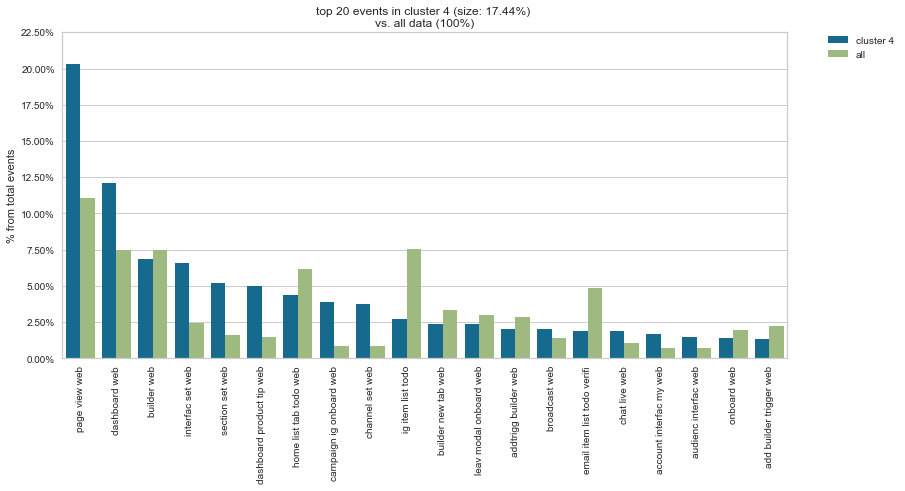

In [139]:
data.rete.cluster_event_dist(independent_researcher_index, top_n=20)

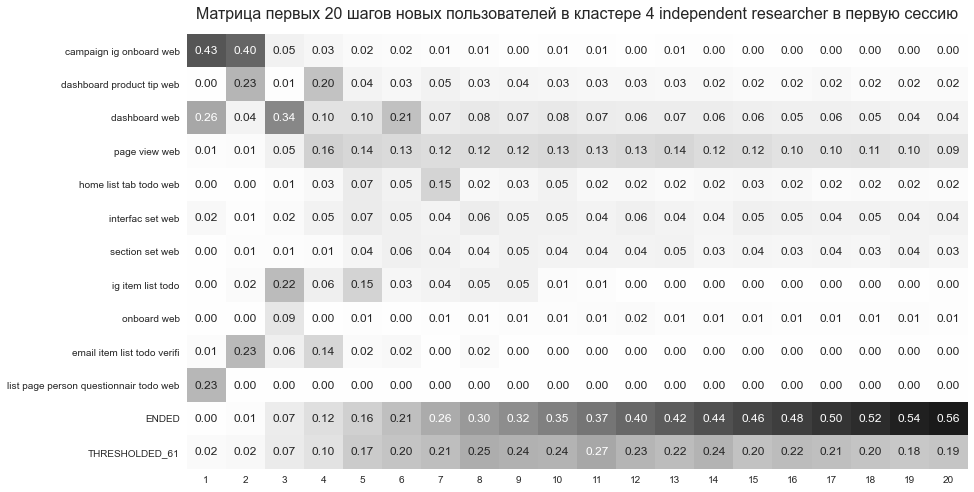

In [140]:
data_clustered.query('client_cluster == @independent_researcher_index').rete.step_matrix(thresh=0.05)
plt.title(f'Матрица первых 20 шагов новых пользователей в кластере {independent_researcher_index} independent \
researcher в первую сессию', fontsize=16, pad=15)
plt.show()

Как и было отмечено при описании кластера, маршрут пользователей кластера independent researcher очень неоднороден и запутан. Именно это их и объединяет)

Явно видно, что большая часть пользователей из этого кластера, начавших первую сессию с раздела онбординга, уже на третьем шаге покинула этот раздел, а на 4 шаге его покинули практически все. И практически никто не вернулся.

Выделим эту группу пользователей и рассмотрим их маршруты отдельно, чтобы увидеть, куда именно ушли пользователи

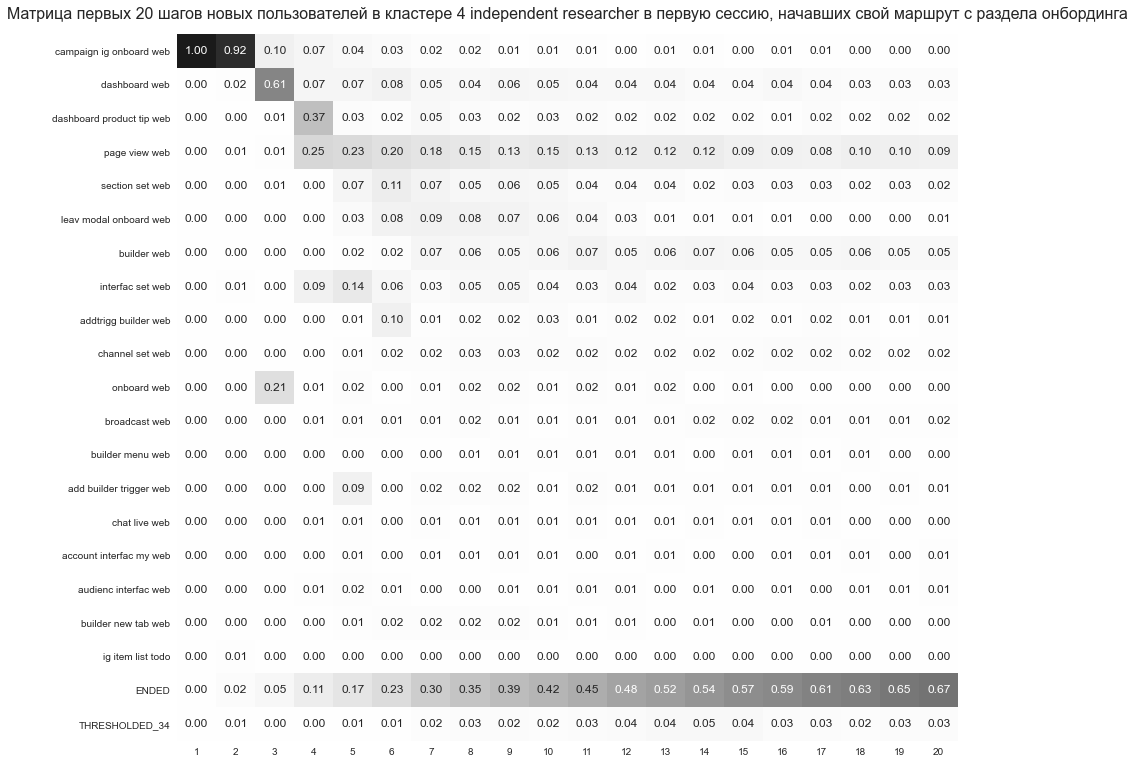

In [141]:
ind = list(data_clustered.query('client_cluster == @independent_researcher_index and num_step_in_session == 1')\
.event_cluster_label.str.contains('onboard').reset_index().query('event_cluster_label == 1')['index'])
l = data_clustered.loc[ind, 'client_id']

data_clustered.query('client_id in @l').rete.step_matrix(thresh=0.01)
plt.title(f'Матрица первых 20 шагов новых пользователей в кластере {independent_researcher_index} independent \
researcher в первую сессию, начавших свой маршрут с раздела онбординга', fontsize=16, pad=15)
plt.show()

Из всех пользователей, начавших свою первую сессию на сайте с раздела онбординга, только треть осталась в этом разделе к 3-му шагу, и далее сохранялось 8-11 % до 9-го шага (суммарно по всем разделам с тегом onboard).

10 % завершили свою первую сессию уже на 4-ом шаге, на 6-ом - 20%, на 20-ом - 60%. \
Остальные, начиная с 3-4-го шага распределились по общим разделам сайта, при этом на 4-ом шаге 38 % оказались в разделе dasboard product tip web, после чего большая часть оставшихся пользователей распределилась по общим разделам сайта (page view web, interface web), также некоторые пользователи заходили в различные разделы конструктора (тег builder).

Таким образом можно сделать вывод, что устойчивый интерес к разделу онбординга сформировался у пользователей, которые до этого исследовали общие разделы страницы и планировщик, а уже потом приступили к обучению (так сделали пользователи из кластера eager learners).

### 2.4. Оценка результатов освоения платформы и платежеспособности кластеров

Для оценки стратегий независимых исследователей и увлеченных учеников проанализируем поведение этих кластеров в следующих сессиях, а также их результаты по целевым действиям в освоении платформы и платежеспособность.

In [142]:
data_clustered_by_1st_session = data_for_final_clustering.merge(data_clustered[['client_id','client_cluster']]\
                                                                .drop_duplicates(), how='left', on='client_id')

Посмотрим, в течение какого времени пользователи успевали совершить первые 5 сессий.

In [143]:
clients_5_sessions = data_clustered_by_1st_session.query('num_session == 5').client_id.unique()
df = data_clustered_by_1st_session.query('client_id in @clients_5_sessions and num_session <= 5')\
.groupby('client_id',as_index=0).agg({'event_dttm':['min', 'max']})
df['start_finish_diff'] = df['event_dttm']['max'] - df['event_dttm']['min']
df['start_finish_diff'].quantile([0,0.5,0.80,0.95,1])

0.00       0 days 03:50:08.523519
0.50       3 days 19:33:51.691852
0.80   13 days 06:59:02.913189800
0.95   30 days 17:11:04.601190999
1.00      61 days 11:09:10.994568
Name: start_finish_diff, dtype: timedelta64[ns]

80% клиентов, у которых было минимум 5 сессий, совершили свои первые 5 сессий в рамках 14 дней с времени первого шага. Для анализа динамики среднего кол-ва шагов и времени по первым 5 сессиям возьмем данные клиентов, совершивших первое действие на платформе не позднее, чем за 14 дней до окончания периода сбора данных.

In [144]:
max_time = data_clustered_by_1st_session.event_dttm.max() - pd.to_timedelta(14, unit='d')
clients_for_5 = data_clustered_by_1st_session.groupby('client_id', as_index=0).agg({'event_dttm':'min'})\
.query('event_dttm < @max_time').client_id.unique()

In [145]:
df = data_clustered_by_1st_session.query('client_id in @clients_for_5 and num_session <= 5')\
.groupby(['client_id','client_cluster','num_session'], as_index=0).agg({'num_step_in_session':'max'})
df.head()

client_id  client_cluster  num_session  num_step_in_session
0     100000               2            1                   11
1     100000               2            2                    7
2     100000               2            3                   10
3     100001               3            1                   17
4     100002               3            1                   16

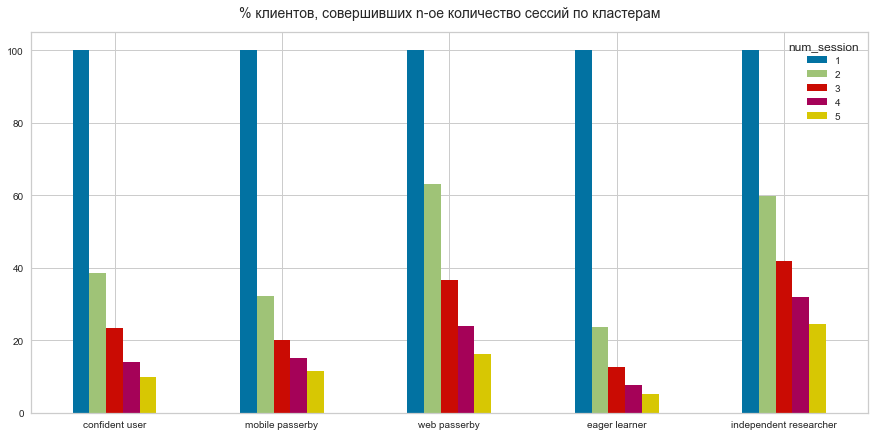

In [146]:
df_agg = df.pivot_table(index = 'client_cluster', columns='num_session', values='client_id', aggfunc='count')\
.sort_index().set_index(cluster_mapping.cluster_name)
df_agg.div(df_agg[1], 0).mul(100).round(1)\
.plot(kind= 'bar', rot=0, figsize=(15,7), xlabel='')
plt.title('% клиентов, совершивших n-ое количество сессий по кластерам', fontsize=14, pad=15)
plt.show()

Наименьшая доля клиентов, совершивших 2 и более сессий в кластере eager learner, в отличие от independent researchers, где показатель оттока по сессиям в ~ 1.5-2 раза ниже. Какие-то выводы из этого факта можно будет сделать только с учетом оценки результатов освоения платформы.

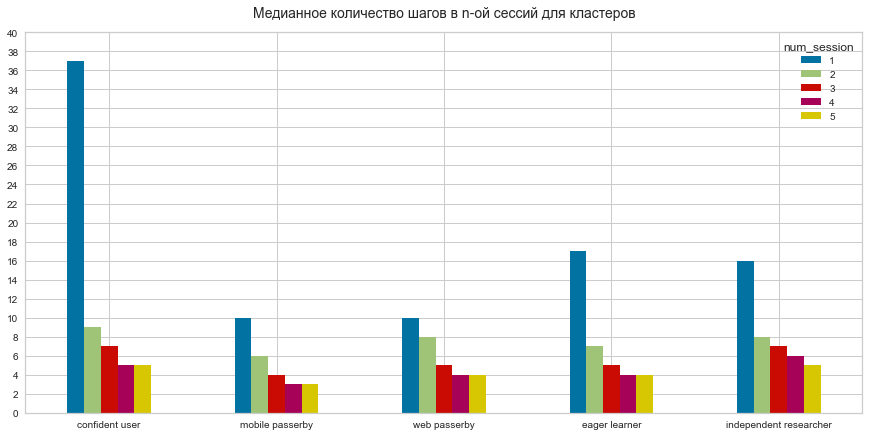

In [147]:
df.pivot_table(index = 'client_cluster', columns='num_session', values='num_step_in_session', aggfunc='median')\
.sort_index().set_index(cluster_mapping.cluster_name)\
.plot(kind= 'bar', rot=0, figsize=(15,7), yticks=range(0,41,2), xlabel='')
plt.title('Медианное количество шагов в n-ой сессий для кластеров', fontsize=14, pad=15)
plt.show()

Больше всего шагов в первую сессию делают уверенные пользователи, любители онбординга не сильно отстают, а вот независимые исследователи делают меньше шагов в первую сессию. При этом во второй сессии медианное количество шагов в этих кластерах выравнивается, сокращаясь в 3-4 раза, и следующие сессии также составляют не более 5 шагов.

In [148]:
df = data_clustered_by_1st_session.query('client_id in @clients_for_5 and num_session <= 5')\
.groupby(['client_id','client_cluster','num_session'], as_index=0).agg({'event_dttm':['min','max']})

df.columns = df.columns.droplevel()
df.columns = ['client_id', 'client_cluster', 'num_session', 'start', 'finish']
df['session_duration'] = (df['finish'] - df['start']).dt.total_seconds() / 60
df.head()

client_id  client_cluster  num_session                      start  \
0     100000               2            1 2021-10-05 20:40:49.401840   
1     100000               2            2 2021-10-05 21:45:46.695597   
2     100000               2            3 2021-10-10 20:49:03.404224   
3     100001               3            1 2021-10-21 10:55:46.023532   
4     100002               3            1 2021-09-30 12:05:05.381512   

                      finish  session_duration  
0 2021-10-05 21:10:36.267423         29.781093  
1 2021-10-05 21:46:30.249664          0.725901  
2 2021-10-10 21:01:03.366294         11.999368  
3 2021-10-21 11:07:06.864483         11.347349  
4 2021-09-30 12:09:35.794417          4.506882

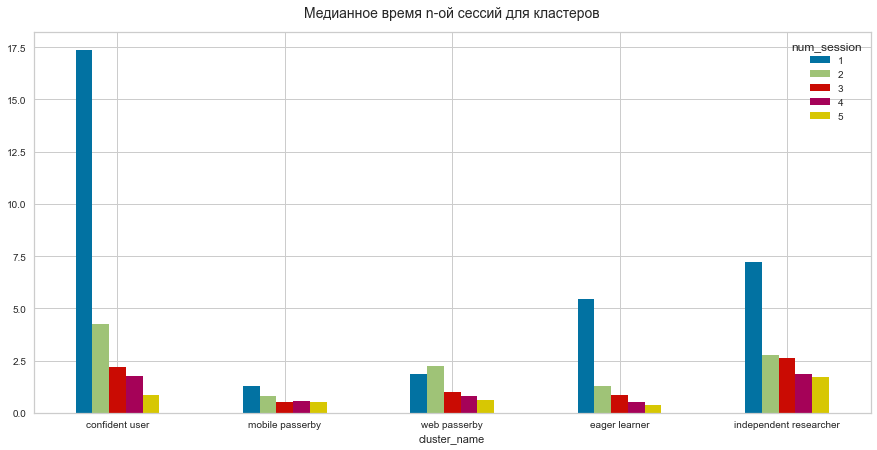

In [149]:
df.pivot_table(index = 'client_cluster', columns='num_session', values='session_duration', aggfunc='median')\
.sort_index().set_index(cluster_mapping.cluster_name)\
.plot(kind= 'bar', rot=0, figsize=(15,7))
plt.title('Медианное время n-ой сессий для кластеров', fontsize=14, pad=15)
plt.show()

Несмотря на меньшее количество шагов по сравнению с eager learners и confident users, independent researchers тратят на 1 и последующие сессии больше времени, чем представители указанных кластеров.

In [150]:
df = pd.concat([data_clustered_by_1st_session[['client_id','client_cluster']],\
data_clean_full[['account_id','client_creationdate', 'ig_enable_dttm', 'first_ig_flow_publish_dttm', 
                 'ig_activation_dttm', 'trial_dttm', 'paid_dttm', 'pro_dttm']]], axis=1)
df = df.drop_duplicates(subset = list(df.columns[[0,1,3,4,5,6,7,8,9]]))

In [151]:
df.shape[0]

11877

In [152]:
df.query('client_id == 102301')

client_id  client_cluster  account_id        client_creationdate  \
132688     102301               3        3085 2021-10-03 16:40:17.384519   
132702     102301               3        3068 2021-10-03 16:40:17.384519   
132705     102301               3        2342 2021-10-03 16:40:17.384519   

                   ig_enable_dttm first_ig_flow_publish_dttm  \
132688 2021-10-03 16:45:15.481470 2021-10-03 16:53:11.348999   
132702 2021-10-04 15:57:26.287367 2021-10-20 20:02:57.199409   
132705 2021-10-18 13:59:28.475328 2021-10-18 14:20:49.134883   

               ig_activation_dttm                 trial_dttm  \
132688 2021-10-04 06:02:30.215396 2021-10-03 16:46:55.273694   
132702 2021-10-21 15:12:17.503305 2021-10-20 19:15:12.375552   
132705                        NaT 2021-10-18 14:04:51.123451   

                 paid_dttm            pro_dttm  
132688                 NaT 2021-10-03 16:46:54  
132702 2021-10-27 19:16:10 2021-10-20 19:15:11  
132705 2021-10-25 14:07:09 2021-10-18 14:04:50

Для каждого аккаунта пользователя свои даты целевых действий.

Для сравнения результативности кластеров нас интересует, дошел ли пользователь до целевого действия хотя бы один раз или не дошел совсем, поэтому используем признак вида 0/1.

In [153]:
df_agg = df.drop('account_id', axis=1).groupby(['client_id', 'client_cluster', 'client_creationdate'], 
                                               as_index=0).nunique()
for col_name in ['ig_enable_dttm','ig_activation_dttm', 'trial_dttm', 'paid_dttm', 'pro_dttm', 
                 'first_ig_flow_publish_dttm']:
    df_agg[col_name] = df_agg[col_name].apply(lambda x: x if x == 0 else 1)

In [154]:
df_agg.query('client_id == 102301')

client_id  client_cluster        client_creationdate  ig_enable_dttm  \
1560     102301               3 2021-10-03 16:40:17.384519               1   

      first_ig_flow_publish_dttm  ig_activation_dttm  trial_dttm  paid_dttm  \
1560                           1                   1           1          1   

      pro_dttm  
1560         1

Прежде чем смотреть на результативность кластеров, убедимся, что их пользователи не имеют явного смещения по периоду регистрации.

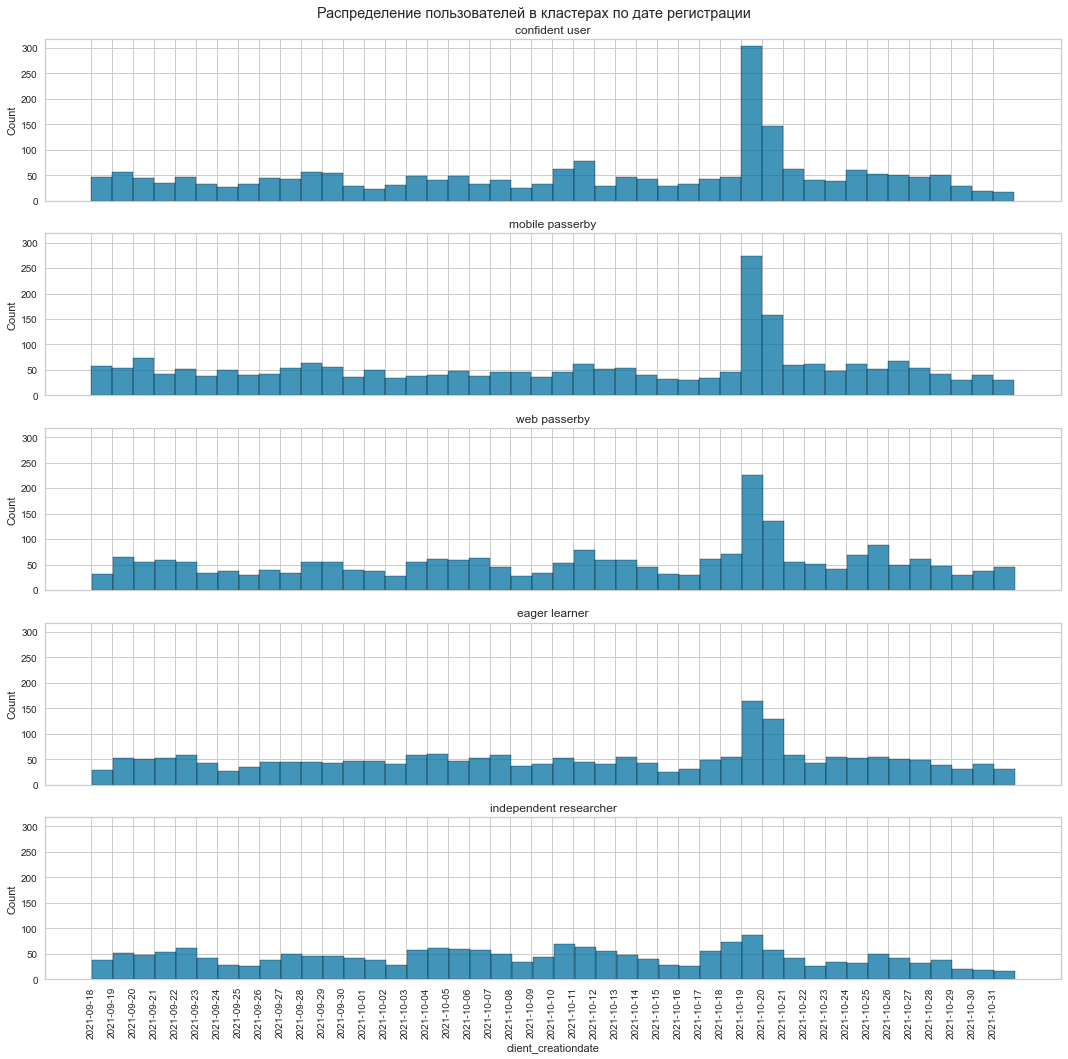

In [155]:
fig, ax = plt.subplots(5,1,figsize=(15,15),sharex=True, sharey=True)
for i in range(n_clusters):
    sns.histplot(data = df_agg.query('client_cluster == @i'), x='client_creationdate', ax=ax[i], binwidth=1)\
    .set_title(f'{cluster_mapping.cluster_name[i]}')
plt.suptitle('Распределение пользователей в кластерах по дате регистрации')
plt.xticks(pd.date_range(data_clean_full.client_creationdate.min().date(), 
                         data_clean_full.client_creationdate.max().date()), rotation=90)
plt.tight_layout()
plt.show()

Значительных отклоннений в распределении дат регистрации между кластерами не наблюдается.

In [156]:
data_clean_full[['event_dttm', 'ig_enable_dttm', 'first_ig_flow_publish_dttm', 'ig_activation_dttm', 
                 'trial_dttm', 'paid_dttm', 'pro_dttm']].apply(['min','max'])

event_dttm             ig_enable_dttm  \
min 2021-09-18 00:25:43.988093 2021-09-18 00:24:26.414161   
max 2021-11-23 23:59:53.965227 2021-10-31 23:48:13.023751   

    first_ig_flow_publish_dttm         ig_activation_dttm  \
min 2021-09-18 00:27:43.876225 2021-09-18 03:59:56.951468   
max 2021-11-16 00:20:40.844190 2021-11-16 00:36:56.372940   

                    trial_dttm           paid_dttm            pro_dttm  
min 2021-09-18 00:50:59.806707 2021-09-20 16:46:51 2021-09-18 00:50:58  
max 2021-11-15 14:35:05.028945 2021-11-14 18:02:44 2021-11-14 18:55:29

Все целевые события произошли в рамках периода эксперимента.

Рассмотрим соотношение доли пользователей, совершивших то или иное целевое действие хотя бы единожды, к общему числу пользователей в данном кластере.

In [157]:
df_agg.drop(['client_id','client_creationdate'], axis=1).groupby('client_cluster')\
.apply(lambda x: round(x.sum() *100 / x.count(), 1)).drop('client_cluster', axis=1)\
.sort_index().set_index(cluster_mapping.cluster_name)

ig_enable_dttm  first_ig_flow_publish_dttm  \
cluster_name                                                         
confident user                   100.0                        71.5   
mobile passerby                  100.0                        70.8   
web passerby                     100.0                        45.8   
eager learner                    100.0                        81.3   
independent researcher           100.0                        48.2   

                        ig_activation_dttm  trial_dttm  paid_dttm  pro_dttm  
cluster_name                                                                 
confident user                        40.7        30.8       13.8      34.2  
mobile passerby                       29.5         8.7        3.4       9.2  
web passerby                          22.6        22.9       10.8      27.3  
eager learner                         36.9        31.9       16.5      34.3  
independent researcher                18.2        21.5        9.0      21.9

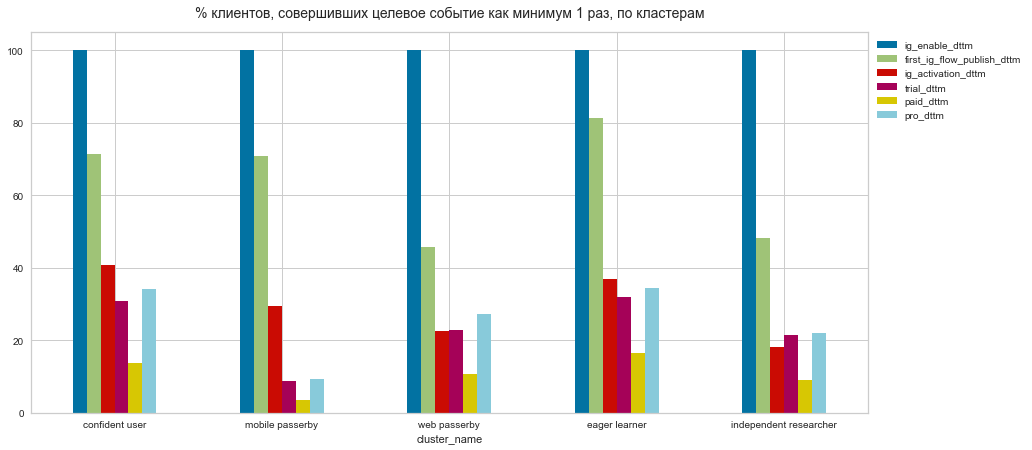

In [158]:
df_agg.drop(['client_id','client_creationdate'], axis=1).groupby('client_cluster')\
.apply(lambda x: round(x.sum() *100 / x.count(), 1)).drop('client_cluster', axis=1)\
.sort_index().set_index(cluster_mapping.cluster_name)\
.plot(kind= 'bar', rot=0, figsize=(15,7))
plt.legend(bbox_to_anchor=(1,1))
plt.title('% клиентов, совершивших целевое событие как минимум 1 раз, по кластерам', fontsize=14, pad=15)
plt.show()

И по освоению платформы, и по коммерческой отдаче среди кластеров прошедших онбординг в первую сессию и независимых исследователей побеждают первые. Значит, лучше текущая система онбординга, чем ее отсутствие.

Установим, по итогам какой сессии было совершено то или иное целевое действие.

In [159]:
df1 = data_clean_full.groupby(['client_id','num_session'], as_index=0).agg({'event_dttm':['min', 'max']})
df1.columns = [(col[0] + '_' + col[1]).strip('_') for col in list(df1.columns)]

df2 = df.drop(['account_id', 'client_creationdate'], axis=1).groupby(['client_id', 'client_cluster'], as_index=0).min()

df = df1.merge(df2, how='left', on='client_id').merge(
    data_clean_full.groupby('client_id', as_index=0).agg({'num_session':'max'})\
    .rename(columns={'num_session':'num_session_max'}),\
    how='left', on='client_id').iloc[:,[0,4,1,11,2,3,5,6,7,8,9,10]]
df.head()

client_id  client_cluster  num_session  num_session_max  \
0     100000               2            1                3   
1     100000               2            2                3   
2     100000               2            3                3   
3     100001               3            1                1   
4     100002               3            1                1   

              event_dttm_min             event_dttm_max  \
0 2021-10-05 20:40:49.401840 2021-10-05 21:10:36.267423   
1 2021-10-05 21:45:46.695597 2021-10-05 21:46:30.249664   
2 2021-10-10 20:49:03.404224 2021-10-10 21:01:03.366294   
3 2021-10-21 10:55:46.023532 2021-10-21 11:07:06.864483   
4 2021-09-30 12:05:05.381512 2021-09-30 12:09:35.794417   

              ig_enable_dttm first_ig_flow_publish_dttm ig_activation_dttm  \
0 2021-10-05 20:36:07.923779                        NaT                NaT   
1 2021-10-05 20:36:07.923779                        NaT                NaT   
2 2021-10-05 20:36:07.923779                        NaT                NaT   
3 2021-10-21 10:54:09.594131 2021-10-21 11:07:41.655267                NaT   
4 2021-09-30 12:04:12.535634 2021-09-30 12:09:50.286770                NaT   

  trial_dttm paid_dttm pro_dttm  
0        NaT       NaT      NaT  
1        NaT       NaT      NaT  
2        NaT       NaT      NaT  
3        NaT       NaT      NaT  
4        NaT       NaT      NaT

Установим условия для проставления номера результативной сессии.

In [160]:
def success_session(df, col):
    if df[col] < df['event_dttm_min']:
        return df['num_session'] - 1 #после мы возьмем минимальные значения по всем колонкам и получится то, что нужно
    if df[col] >= df['event_dttm_min'] and df[col] <= df['event_dttm_max']:
        return df['num_session']
    if df[col] > df['event_dttm_max'] and df['num_session'] == df['num_session_max']:
        return df['num_session']
    else:
        return np.nan

In [161]:
for col in ['ig_enable_dttm', 'first_ig_flow_publish_dttm', 'ig_activation_dttm', 
            'trial_dttm', 'paid_dttm', 'pro_dttm']:
    df[col + '_num_session'] = df.apply(lambda x: success_session(x,col), 1)

In [162]:
df.client_id.nunique()

11173

In [163]:
data_session_success = \
df.groupby(['client_id', 'client_cluster', 'num_session_max',], as_index=0)\
.agg({'ig_enable_dttm_num_session':'min',
      'first_ig_flow_publish_dttm_num_session':'min',
      'ig_activation_dttm_num_session':'min', 
      'trial_dttm_num_session':'min',
      'paid_dttm_num_session':'min', 
      'pro_dttm_num_session':'min'})

In [164]:
df2.shape[0]

11173

In [165]:
data_session_success = df2.merge(data_session_success.drop('client_cluster', axis=1), how='left', on='client_id')\
.iloc[:,[0,1,8,2,3,4,5,6,7,9,10,11,12,13,14]]
data_session_success.head()

client_id  client_cluster  num_session_max             ig_enable_dttm  \
0     100000               2                3 2021-10-05 20:36:07.923779   
1     100001               3                1 2021-10-21 10:54:09.594131   
2     100002               3                1 2021-09-30 12:04:12.535634   
3     100003               1                1 2021-10-20 06:07:09.788300   
4     100004               3                1 2021-10-04 02:09:54.932728   

  first_ig_flow_publish_dttm         ig_activation_dttm  \
0                        NaT                        NaT   
1 2021-10-21 11:07:41.655267                        NaT   
2 2021-09-30 12:09:50.286770                        NaT   
3 2021-10-20 06:45:45.668886                        NaT   
4 2021-10-04 02:15:05.160874 2021-10-04 10:12:56.910884   

                  trial_dttm           paid_dttm            pro_dttm  \
0                        NaT                 NaT                 NaT   
1                        NaT                 NaT                 NaT   
2                        NaT                 NaT                 NaT   
3 2021-10-20 06:09:35.887671                 NaT 2021-10-20 06:09:34   
4 2021-10-04 02:21:38.390630 2021-10-16 02:24:09 2021-10-04 02:21:37   

   ig_enable_dttm_num_session  first_ig_flow_publish_dttm_num_session  \
0                           0                                     NaN   
1                           0                                     1.0   
2                           0                                     1.0   
3                           0                                     1.0   
4                           0                                     1.0   

   ig_activation_dttm_num_session  trial_dttm_num_session  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             NaN                     NaN   
3                             NaN                     0.0   
4                             1.0                     1.0   

   paid_dttm_num_session  pro_dttm_num_session  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   0.0  
4                    1.0                   1.0

Рассмотрим медианные показатели сессий, во время или после которых совершались целевые действия, сначала в общем, потом по кластерам.

*0 в данном случае означает - до начала первой сессии

In [166]:
data_session_success.head()

client_id  client_cluster  num_session_max             ig_enable_dttm  \
0     100000               2                3 2021-10-05 20:36:07.923779   
1     100001               3                1 2021-10-21 10:54:09.594131   
2     100002               3                1 2021-09-30 12:04:12.535634   
3     100003               1                1 2021-10-20 06:07:09.788300   
4     100004               3                1 2021-10-04 02:09:54.932728   

  first_ig_flow_publish_dttm         ig_activation_dttm  \
0                        NaT                        NaT   
1 2021-10-21 11:07:41.655267                        NaT   
2 2021-09-30 12:09:50.286770                        NaT   
3 2021-10-20 06:45:45.668886                        NaT   
4 2021-10-04 02:15:05.160874 2021-10-04 10:12:56.910884   

                  trial_dttm           paid_dttm            pro_dttm  \
0                        NaT                 NaT                 NaT   
1                        NaT                 NaT                 NaT   
2                        NaT                 NaT                 NaT   
3 2021-10-20 06:09:35.887671                 NaT 2021-10-20 06:09:34   
4 2021-10-04 02:21:38.390630 2021-10-16 02:24:09 2021-10-04 02:21:37   

   ig_enable_dttm_num_session  first_ig_flow_publish_dttm_num_session  \
0                           0                                     NaN   
1                           0                                     1.0   
2                           0                                     1.0   
3                           0                                     1.0   
4                           0                                     1.0   

   ig_activation_dttm_num_session  trial_dttm_num_session  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             NaN                     NaN   
3                             NaN                     0.0   
4                             1.0                     1.0   

   paid_dttm_num_session  pro_dttm_num_session  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   0.0  
4                    1.0                   1.0

In [167]:
data_session_success[['ig_enable_dttm_num_session',
                      'first_ig_flow_publish_dttm_num_session',
                      'ig_activation_dttm_num_session', 
                      'trial_dttm_num_session',
                      'paid_dttm_num_session', 
                      'pro_dttm_num_session']]\
.quantile([0,0.5,0.8,0.9,1])

ig_enable_dttm_num_session  first_ig_flow_publish_dttm_num_session  \
0.0                         0.0                                     1.0   
0.5                         0.0                                     1.0   
0.8                         0.0                                     2.0   
0.9                         0.0                                     3.0   
1.0                         0.0                                    86.0   

     ig_activation_dttm_num_session  trial_dttm_num_session  \
0.0                             1.0                     0.0   
0.5                             1.0                     1.0   
0.8                             2.0                     1.0   
0.9                             3.0                     3.0   
1.0                            59.0                    55.0   

     paid_dttm_num_session  pro_dttm_num_session  
0.0                    0.0                   0.0  
0.5                    1.0                   1.0  
0.8                    3.0                   1.0  
0.9                    5.0                   3.0  
1.0                   33.0                  55.0

Событие ig_enable случается до первой сессии в 100% случаев. Абсолютное большинство клиентов (80%), совершивших публикацию бота, и активировавших инстаграм-канал, сделали это по итогам 1-2 сессий. Покупки также чаще всего происходили уже по итогам 1 сессии (пробная и полная pro-подписка), обычная (не pro) подписка покупалась по итогам первых 3 сессий.

Таким образом, в абсолютном большинстве случаев пользователь либо доходит до целевых действий уже за первые пару сессий, либо не достигает целевых действий вообще.

Ранее уже было отмечено, что по количеству сессий среди пользователей есть выбросы, они есть и по показателю количества сессий до целевого действия. Для агрегированной характеристики кластеров по сессии выполнения целевого действия возьмем 80% квантиль, так как среднее само по себе будет трудно интерпретируемо и не даст ясной картины, плюс выбросы.

In [168]:
data_session_success[['client_cluster',
                      'first_ig_flow_publish_dttm_num_session',
                      'ig_activation_dttm_num_session', 
                      'trial_dttm_num_session',
                      'paid_dttm_num_session', 
                      'pro_dttm_num_session']].groupby('client_cluster')\
.quantile(0.8).sort_index().set_index(cluster_mapping.cluster_name)

first_ig_flow_publish_dttm_num_session  \
cluster_name                                                     
confident user                                             2.0   
mobile passerby                                            1.0   
web passerby                                               3.2   
eager learner                                              1.0   
independent researcher                                     3.0   

                        ig_activation_dttm_num_session  \
cluster_name                                             
confident user                                     2.0   
mobile passerby                                    1.0   
web passerby                                       3.0   
eager learner                                      1.0   
independent researcher                             4.0   

                        trial_dttm_num_session  paid_dttm_num_session  \
cluster_name                                                            
confident user                             1.0                    2.0   
mobile passerby                            2.0                    2.8   
web passerby                               2.0                    4.0   
eager learner                              1.0                    2.0   
independent researcher                     1.0                    5.0   

                        pro_dttm_num_session  
cluster_name                                  
confident user                           1.0  
mobile passerby                          2.0  
web passerby                             2.0  
eager learner                            1.0  
independent researcher                   1.8

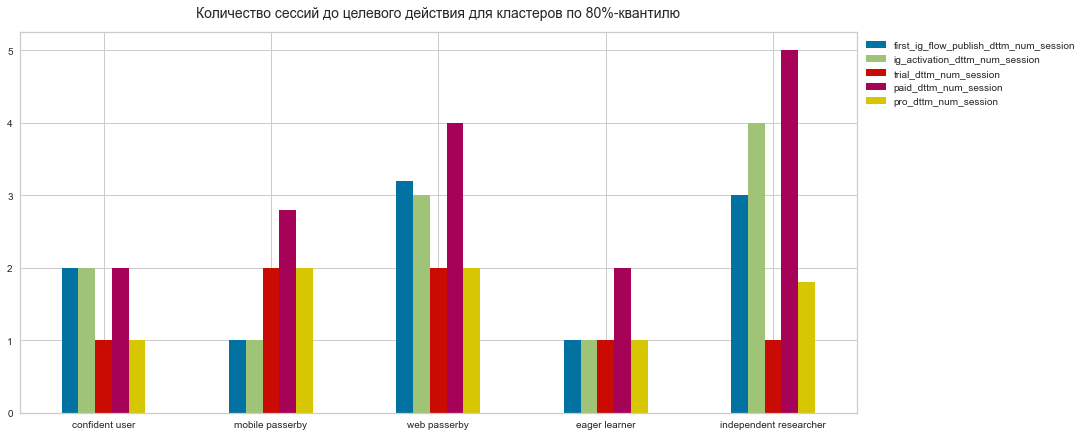

In [169]:
data_session_success[['client_cluster',
                      'first_ig_flow_publish_dttm_num_session',
                      'ig_activation_dttm_num_session', 
                      'trial_dttm_num_session',
                      'paid_dttm_num_session', 
                      'pro_dttm_num_session']].groupby('client_cluster')\
.quantile(0.8)\
.sort_index().set_index(cluster_mapping.cluster_name)\
.plot(kind= 'bar', rot=0, figsize=(15,7), yticks=range(0,6,1), xlabel='')
plt.title('Количество сессий до целевого действия для кластеров по 80%-квантилю', fontsize=14, pad=15)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

И снова как по скорости освоения платформы, так и по скорости коммерческой отдачи среди кластеров прошедших онбординг в первую сессию и независимых исследователей быстрее оказываются первые.

### 2.5. Сравнение поведения пользователей в выбранных кластерах во второй сессии

Рассмотрим соотношение долей событий для каждого кластера и матрицу первых 15 шагов во второй сессии по интересующим нас кластерам для полной картины. 

In [170]:
def top_events_bars(clus_0=None, clus_1=None, num_session=1, top_n=8):
    bar0 = data_clustered_by_1st_session.query('client_cluster == @clus_0 & num_session == @num_session')\
    .groupby('event_cluster_label', as_index=0).agg({'client_id':'count'}).sort_values('client_id', ascending=0)
    bar0[f'cluster_{clus_0} {cluster_mapping.cluster_name[clus_0]}'] = \
    round(bar0.client_id *100 / bar0.client_id.sum(), 1)
    bar0 = bar0.drop(labels='client_id', axis=1).head(top_n)

    if clus_1==None:    
        bar1 = data_clustered_by_1st_session.query('num_session == @num_session')\
        .groupby('event_cluster_label', as_index=0).agg({'client_id':'count'}).sort_values('client_id', ascending=0)
        bar1['all_data'] = round(bar1.client_id *100 / bar1.client_id.sum(), 1)
        bar1 = bar1.drop(labels='client_id', axis=1)
    else:
        bar1 = data_clustered_by_1st_session.query('client_cluster == @clus_1 & num_session == @num_session')\
        .groupby('event_cluster_label', as_index=0).agg({'client_id':'count'})
        bar1[f'cluster_{clus_1} {cluster_mapping.cluster_name[clus_1]}'] = \
        round(bar1.client_id *100 / bar1.client_id.sum(), 1)
        bar1 = bar1.drop(labels='client_id', axis=1)

    bars01=bar0.merge(bar1, on='event_cluster_label').set_index('event_cluster_label')

    bars01.plot(kind='bar', xlabel='')
    plt.title(f'top {top_n} events in {num_session} session in cluster {clus_0} \
({cluster_mapping.cluster_name[clus_0]}) \n vs. {bars01.columns[1]}')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

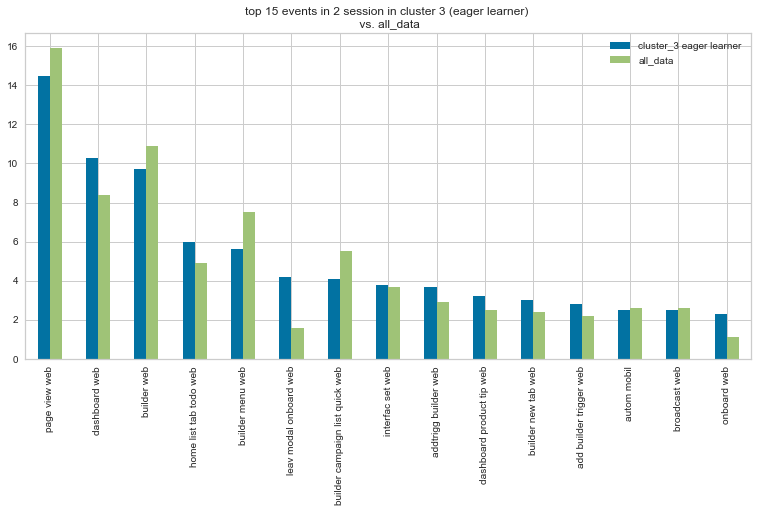

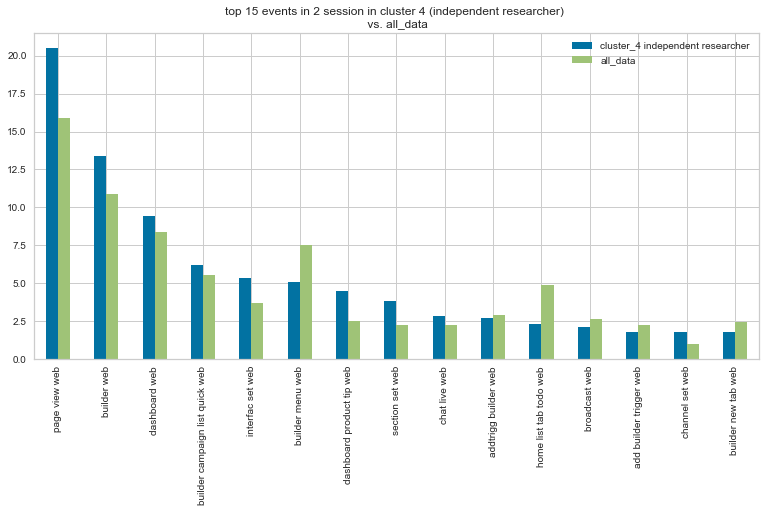

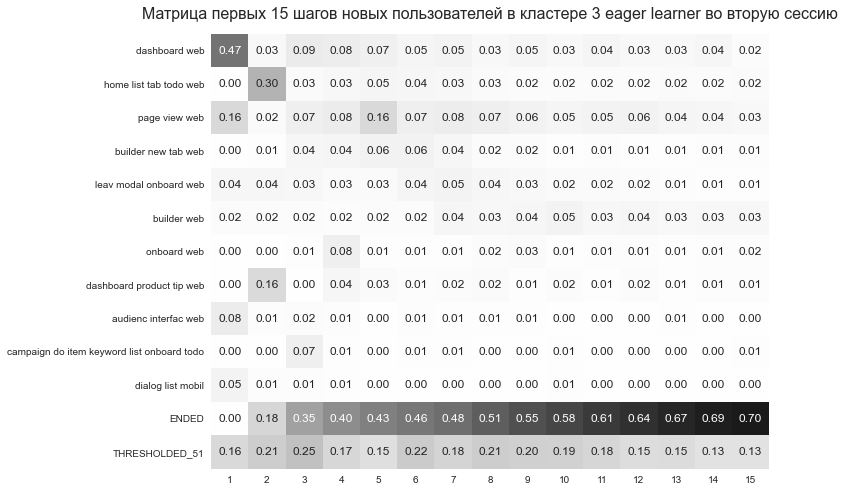

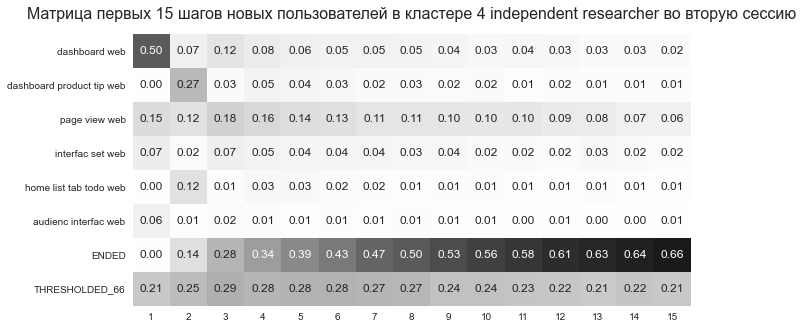

In [171]:
for i in [eager_learner_index, independent_researcher_index]:
    top_events_bars(clus_0=i, num_session=2, top_n=15)
for i in [eager_learner_index, independent_researcher_index]:
    data_clustered_by_1st_session.query('num_session == 2 & client_cluster == @i')\
    .rete.step_matrix(max_steps=15, thresh=0.05)
    plt.title(f'Матрица первых 15 шагов новых пользователей в кластере {i} {cluster_mapping.cluster_name[i]} \
во вторую сессию', fontsize=16, pad=15)
    plt.show()

И по составу самых частых событий, и по маршруту во второй сессии кластеры eager learner и independent researcher очень похожи. Они посещают общие разделы сайта и конструктор, однако не делают много шагов. Видимо, просто доделывают то, что не сделали в рамках первой сессии или изучают какие-то доп.вопросы.

Ранее было показано, что основные шаги по освоению пользователи совершают в первую сессию, решения по оплате подписки тоже чаще всего происходят по итогам первой сессии.

### 2.6. Анализ соотношений категориальных признаков по кластерам

Рассмотрим также соотношения по некоторым категориальным признакам по кластерам.

In [172]:
df = data_clean_full.merge(data_clustered[['client_id','client_cluster']]\
                                                                .drop_duplicates(), how='left', on='client_id')\
[['client_id','first_device_type_of_user','country_group','traffic_source','hear_source',\
  'initial_channel','client_cluster']].drop_duplicates(subset='client_id')
df.head()

client_id first_device_type_of_user  country_group traffic_source  \
0      100000                   Android           Asia        Organic   
28     100001                   Desktop  South America        Unknown   
45     100002                   Desktop  South America        Organic   
61     100003                       iOS  South America        Unknown   
81     100004                   Desktop           Asia         Search   

                           hear_source initial_channel  client_cluster  
0   Recommended by friend or colleague              IG               2  
28                        Social media              IG               3  
45                       Search Engine              IG               3  
61  Recommended by friend or colleague              IG               1  
81                       Search Engine              IG               3

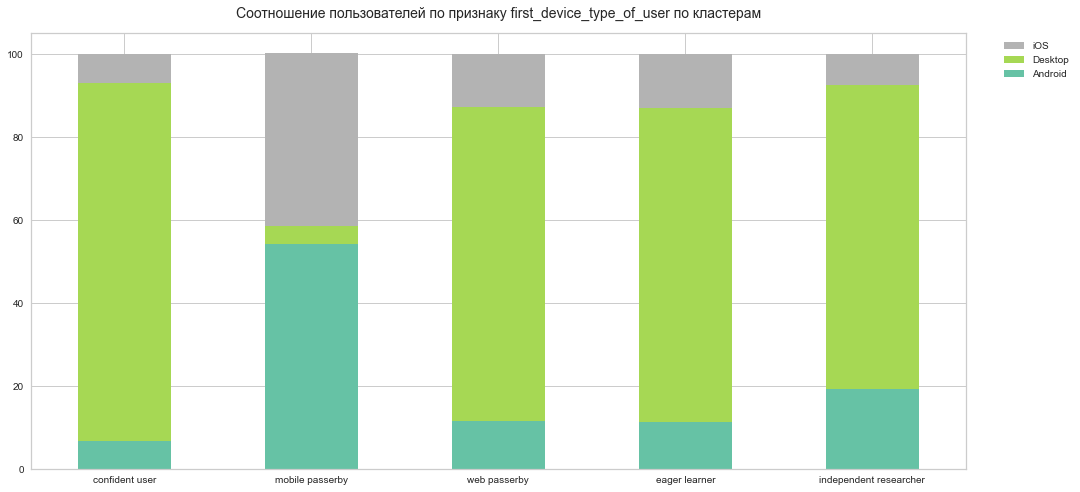

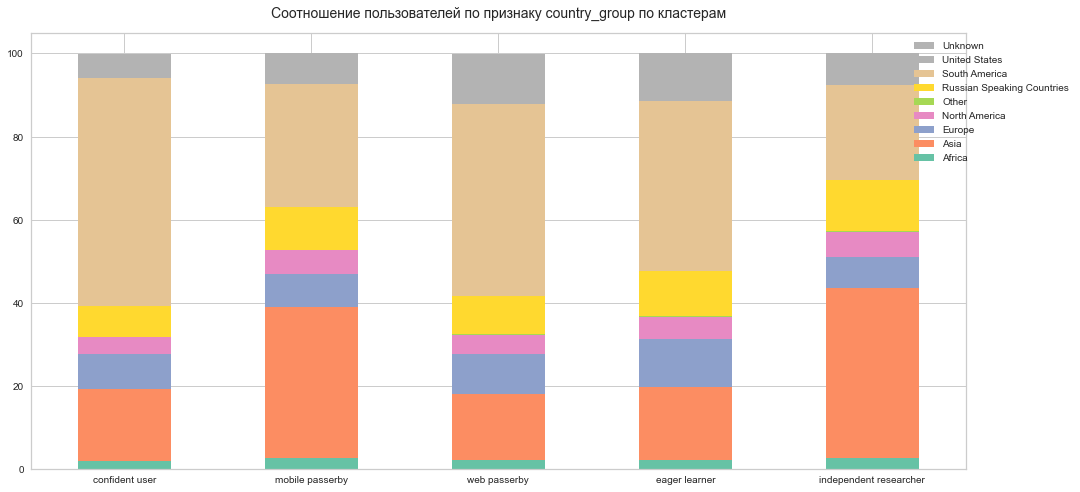

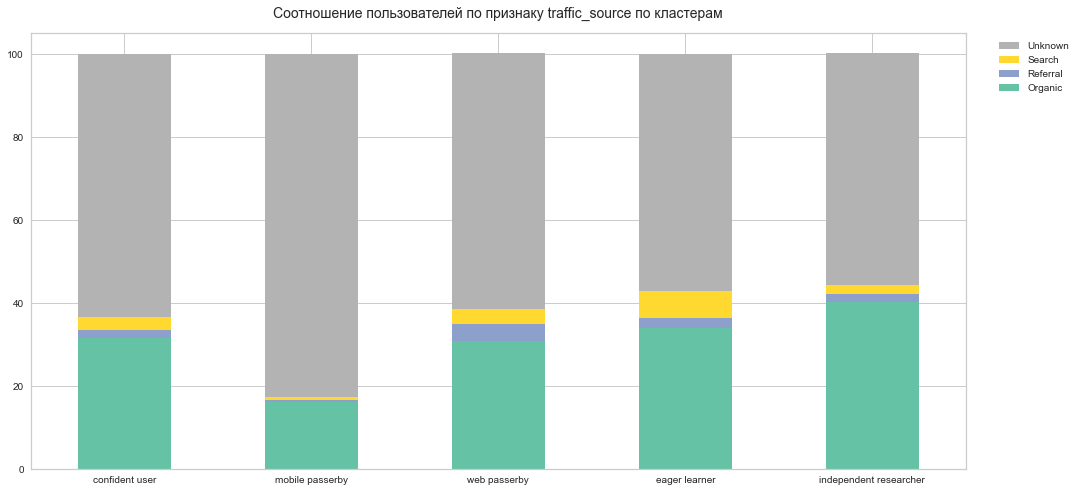

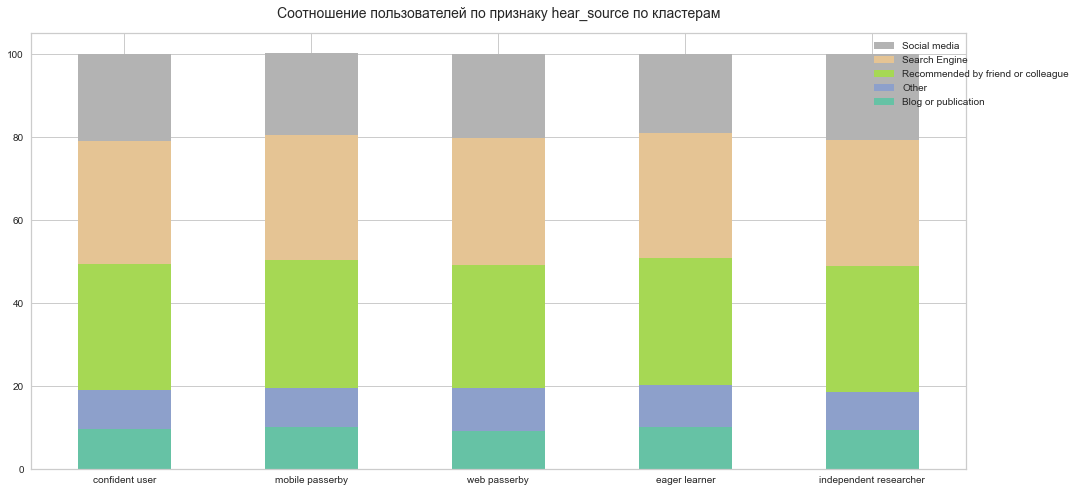

In [173]:
for col in ['first_device_type_of_user','country_group','traffic_source','hear_source']:
    df_agg = df.pivot_table(index='client_cluster', columns=col, values='client_id', aggfunc='count')\
    .apply(lambda x: round(x*100/x.sum(),1),1)\
    .sort_index().set_index(cluster_mapping.cluster_name)

    ax=df_agg.plot(kind='bar', stacked=True, figsize=(15,7),
              colormap='Set2')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.12,1), loc="upper right")
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(f'Соотношение пользователей по признаку {col} по кластерам', fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

Из того, что бросается в глаза:
1. У independent researchers доля пользователей из Азии гораздо выше, чем у eager learners - возможно, онбординг плохо адаптирован для представителей азиатских стран, можно это проверить в контролируемом эксперименте.
2. У eager learners больше доля поиска в источниках трафика, чем у independent researchers, что косвенно подтверждает большую мотивацию первых.

Итак, мы получили достаточно сведений для формирования общих выводов и рекомендаций.

## 3. Выводы и рекомендации

Благодаря кластеризации новых пользователей по CJM первой сессии мы получили несколько стратегий освоения функционала платформы:

1\) Уверенные пользователи сразу переходят в раздел быстрого построения бота и за относительно короткое время достигают целевых событий

2\) Неопытные пользователи, готовые учиться по онбордингу (eager learner), сразу после стандартных мероприятий (подтверждение почты и подключения инстаграм-аккаунта в планировщике), переходят в раздел онбординга и проходят его, попутно выполняя действия по конструированию бота.

3\) Экспериментаторы (independent researcher), генерирующие больше разнообразных событий в разделах конструктора и планировщика, при этом достигая менее заметных результатов по итогам первой сессии.

4,5) Пользователи, в рамках первой сессии проходящие только стандартные процедуры для подтверждения аккаунта и проч., используя функционал веб-платформы или мобильное приложение.

Также есть пользователи, не совершающие никаких действий на платформе после регистрации аккаунта, все они вторые админы аккаунтов, поэтому для задачи оптимизации онбординга их данные не представляют ценности. 

Стоит отметить, что во второй и последующих сессиях пользователи всех кластеров делают в 2.5-3 раза меньше шагов, чем в первую, и показатели их перфоманса в основном формируются уже по итогам первой сессии. Вообще большинство пользователей делают не более одной сессии. Но даже пользователи, которые делают больее одной сессии, начиная со второй сессиии делают это все менее и менее активно, посещая только общие разделы и некоторые вкладки конструктора.
Таким образом, данные по первой сессии имеют очень высокий вес в оценке всего пользовательсткого маршрута.

Наиболее интересными для целей анализа кластерами являются кластеры eager learner и independent researcher, так как это два кластера неопытных пользователей, которые используют совершенно разные стратегии для освоения платформы.

В общих чертах маршрут eager learner в первой сессии выглядит так:
1. лист опросника (questionare)
2. стандартные процедуры (подтверждение почты email verify, подключение инстаграм-аккаунта ig connect)
3. изучение разделов планировщика и общих разделов сайта (todo list, dashboard)
4. возвращение к планировщику
5. переход в раздел онбординга в разделе планировщика (onboard todo)
6. переход в отдельный раздел онбординга (onboard web)
7. навигация по общим разделам сайта, выполнение начальных действий по созданию бота, с периодическим возвращением к онбордингу.

Маршрут пользователей кластера independent researcher очень неоднороден и запутан.
Довольно значимая часть пользователей из данного кластера начинает первую сессию с раздела онбординга, но быстро с него уходит в попытке достичь быстрых результатов своими силами. Однако, данные пользователи тратят по медиане больше времени на первую сессию, проделывая меньше шагов и достигая более низких результатов освоения, чем eager learners.


Для получения обратной связи по текущему разделу онбординга лучше обратиться к пользователям из кластера eager learners, прошедшим достаточное количество шагов онбординга. Они расскажут нюансы взаимодействия с платформой в этом разделе. Пользователям-экспериментаторам, не достигшим целевых действий по освоению платформы, можно прислать пуш с предложением ознакомиться с онбордингом.

Спасибо, что досмотрели до конца!)